# HOME CREDIT SCORE CARD MODEL

## Problems
HCI wants to use machine learning to help the team figure out if the proposed loan is approved or not. They also want to look at the existing data to see what kinds of customers often get loans and are approved so they can find the next target market.

## Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest #Feature Selection
from sklearn.feature_selection import chi2
from sklearn.utils import resample #Re-Sampling
from sklearn.model_selection import train_test_split #Data Splitting
from sklearn.preprocessing import StandardScaler #Normalize Features

from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #K-Nearest Neighbor
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Main Dataset

### Data Application (Train)

In [3]:
# Training Dataset
dataset_train = pd.read_csv('application_train.csv', sep = ',')
print('The collection of data includes %d rows and %d columns. \n' % dataset_train.shape)
dataset_train.head()

The collection of data includes 307511 rows and 122 columns. 



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

There are total 307511 rows which contains the information of loans and there are 122 features.

The TARGET feature tells you if the client had trouble making payments, which means they were more than X days late on at least one of the first Y loan payments. Each other case is marked as 0, while this one is marked as 1.

## Exploratory Data Analysis (EDA):

### Check Data Types

In [4]:
print('Data Types:\n')
dataset_train.info(verbose = True)

Data Types:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int

## Visualization

In [5]:
train = dataset_train.copy()

### Number of Customers Based on Their Ability to Pay

In [6]:
decode_map = {0: "No Problems with Payment", 1: "Problems with Payment"}
def decode_sentiment(label):
    return decode_map[int(label)]

train['TARGET'] = train['TARGET'].apply(lambda x: decode_sentiment(x))

In [7]:
target_group = (train[['TARGET']]
                    .groupby("TARGET")
                    .agg(COUNT = ("TARGET","count"))
                    .sort_values(by=["COUNT"], ascending = False)
                    .reset_index()
               )
target_group

,TARGET,COUNT
0,No Problems with Payment,282686
1,Problems with Payment,24825


In [8]:
group = (train[['TARGET']]
            .value_counts(normalize=True)
        )
group.reset_index().style.background_gradient(cmap='Blues')

,TARGET,proportion
0,No Problems with Payment,0.919271
1,Problems with Payment,0.080729


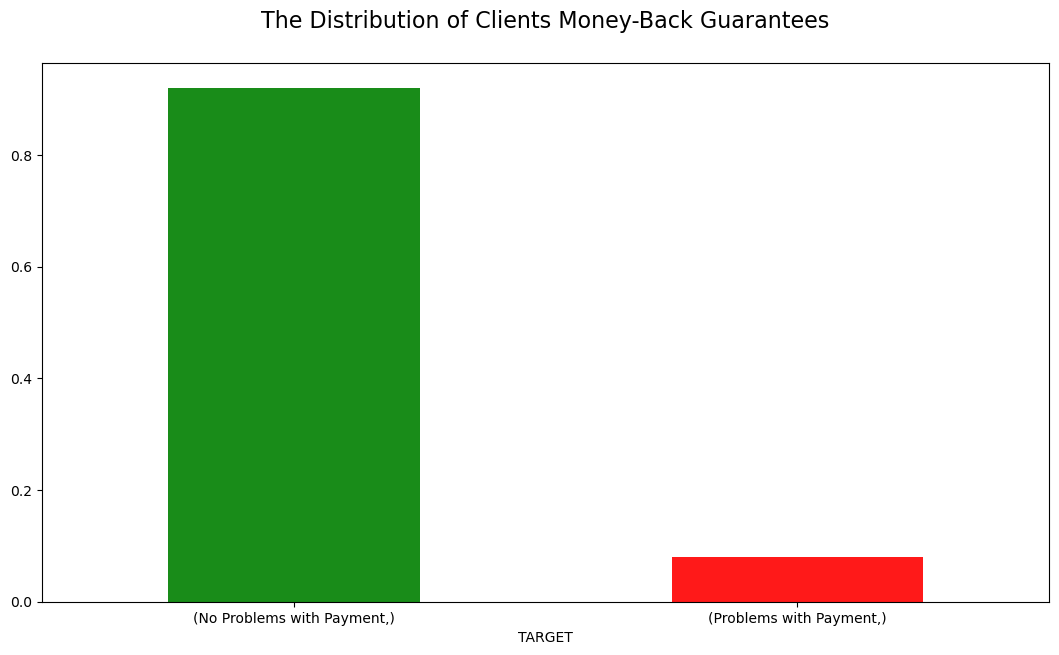

In [9]:
fig = plt.figure(figsize = (13,7))
group.plot(kind='bar', color= ['green','red'], alpha = 0.9, rot=0)
plt.title('The Distribution of Clients Money-Back Guarantees\n', fontsize=16)
plt.show()

91% of the loans are for about $282K, and the TARGET value is 0. This means that the client had no trouble paying back the loan on time. Only 9% of all loans in this dataset (about 24K applicants) had clients who had trouble paying back the loan.

Note: This dataset is not balanced, and it needs to be resampled or given special care. In the section called "model building," the resampling step will be done.

### Categorical Features VS Target

#### Contract Type, Gender, Car Ownership Status, and Realty Ownership Status

<Axes: title={'center': '\nClients Ability to Pay Based on Type of Ownership Status\n'}, xlabel='FLAG_OWN_REALTY', ylabel='count'>

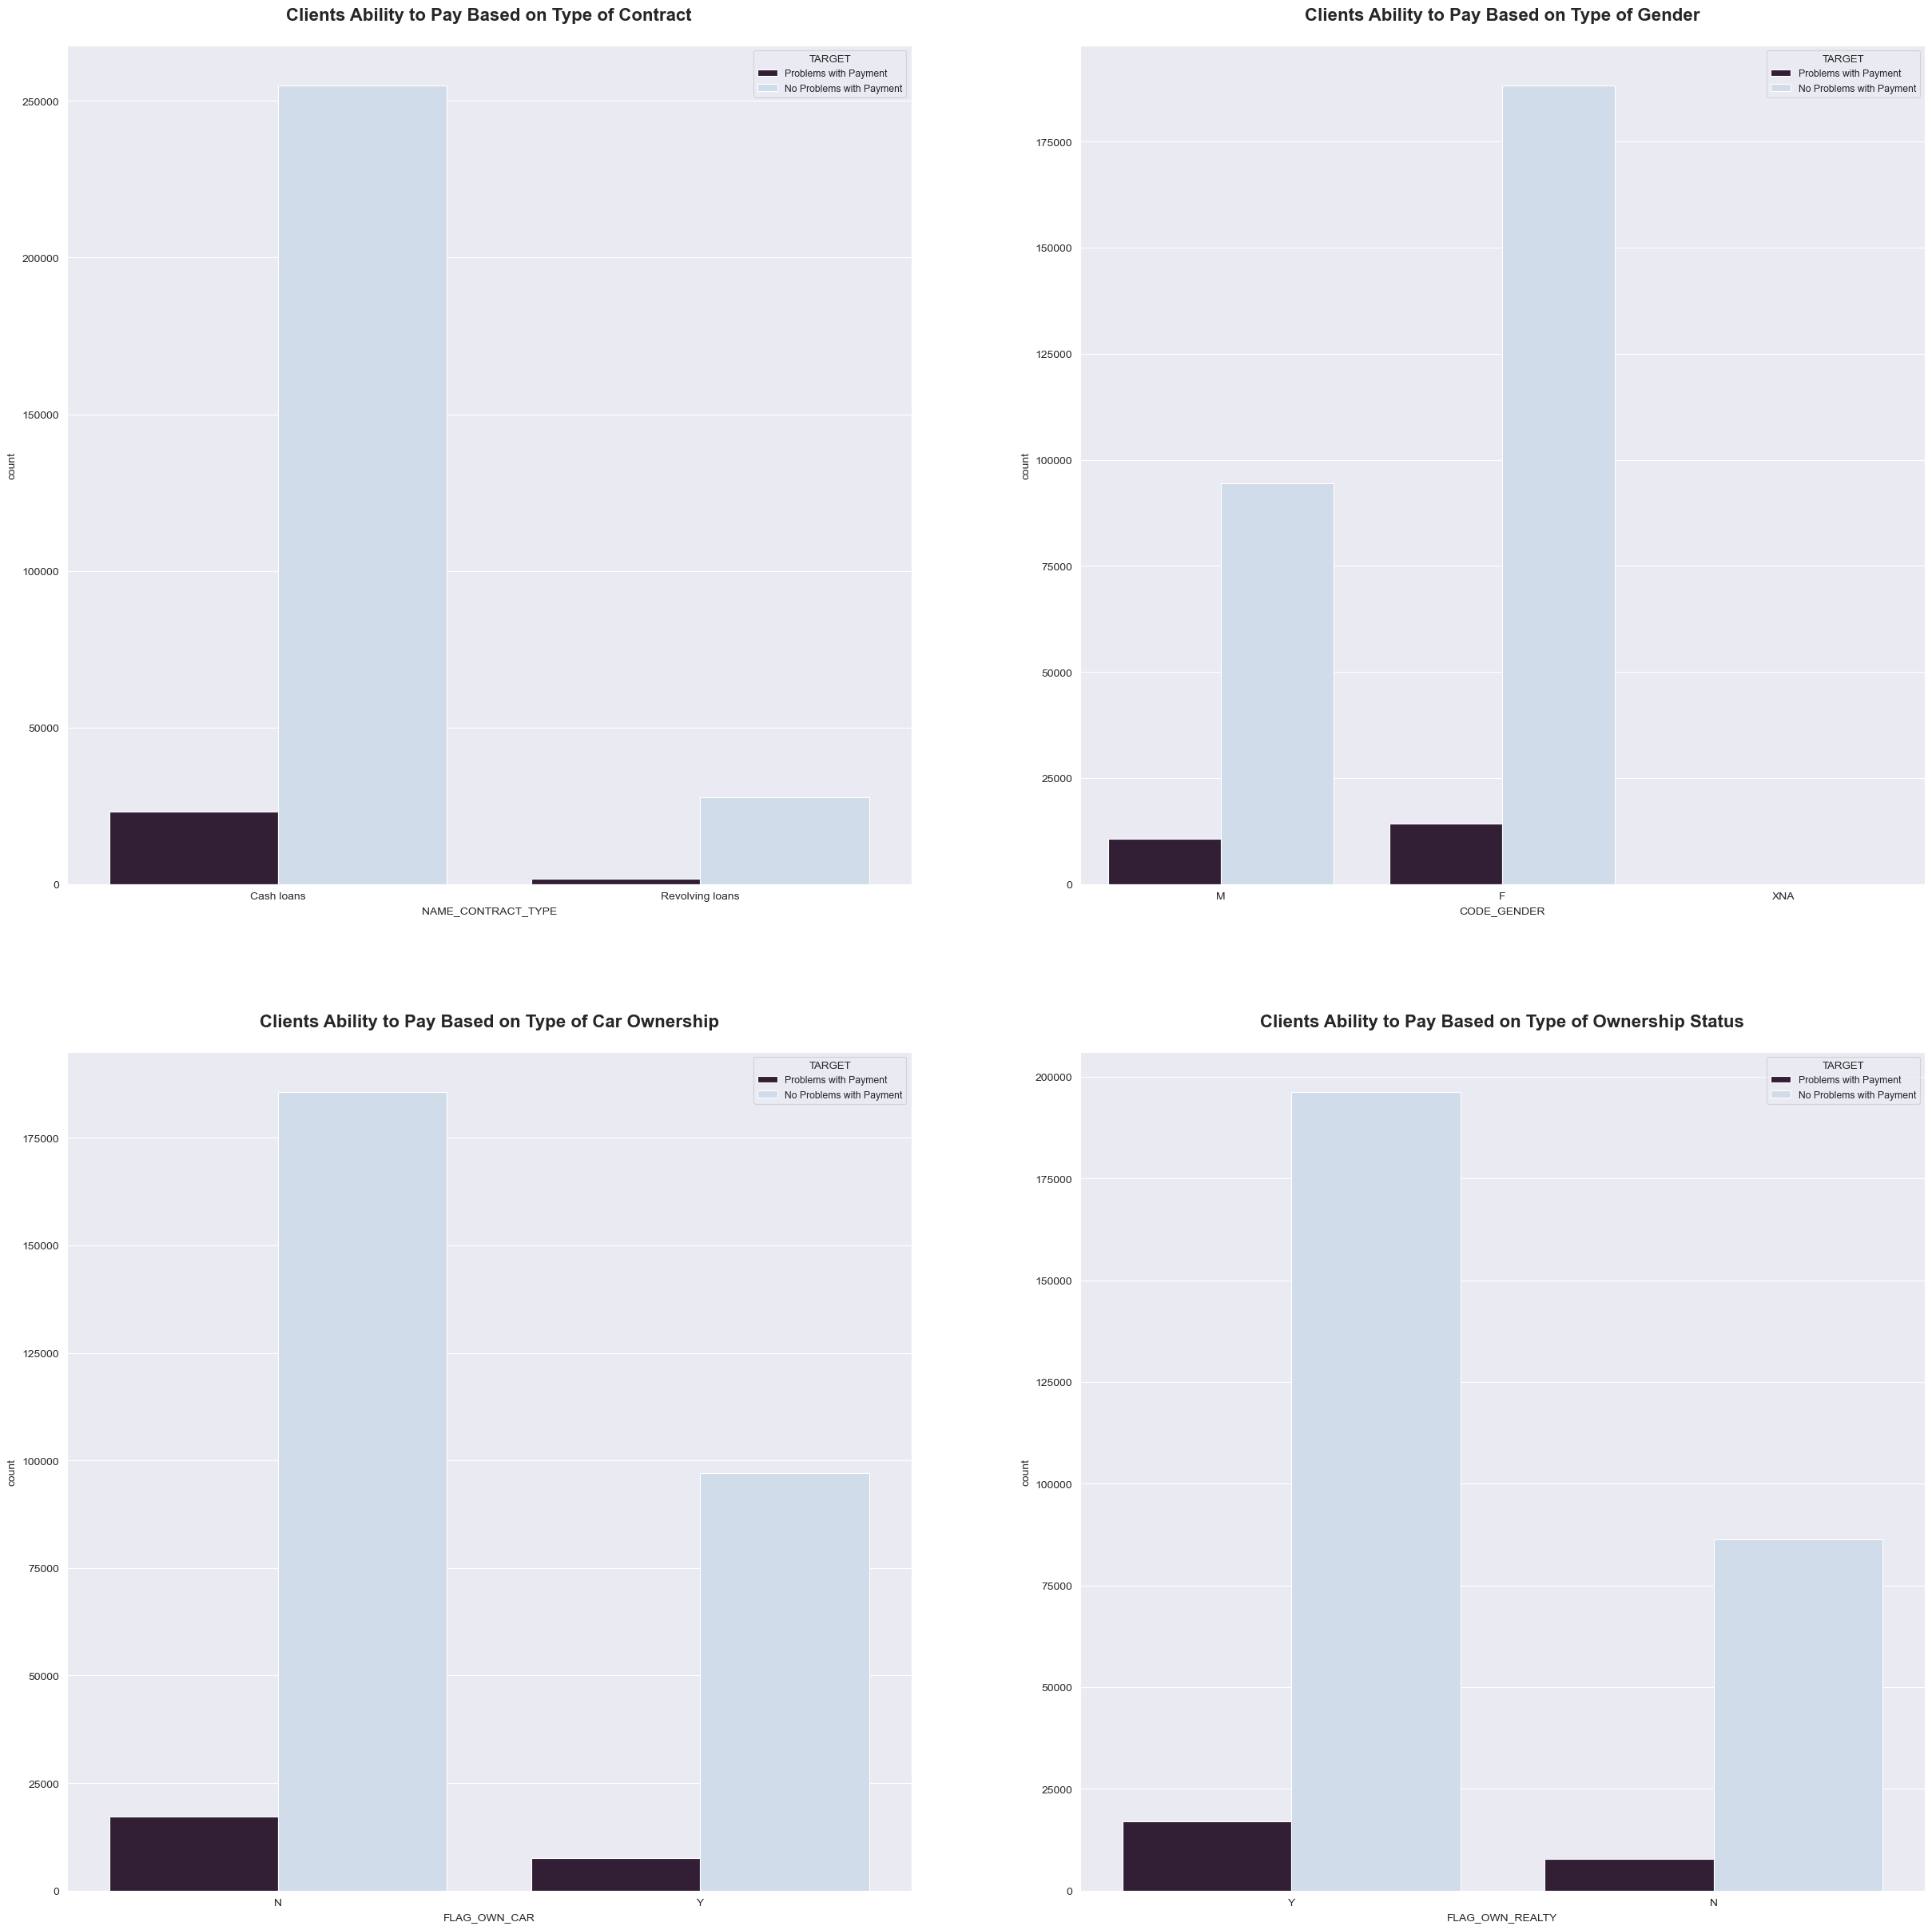

In [10]:
# Visualization pt 1
sns.set_style('darkgrid')
fig, ax = plt.subplots(2,2, figsize=(30,30))
sns.set_context('paper', font_scale=1)

ax[0][0].set_title('Clients Ability to Pay Based on Type of Contract\n', fontweight='bold', fontsize=16)
sns.countplot(x='NAME_CONTRACT_TYPE', data = train, hue = 'TARGET', palette = 'ch:start=0.5,rot=-.3_r', ax=ax[0][0])

ax[0][1].set_title('Clients Ability to Pay Based on Type of Gender\n', fontweight='bold', fontsize=16)
sns.countplot(x='CODE_GENDER', data = train, hue = 'TARGET', palette = 'ch:start=0.5,rot=-.3_r', ax=ax[0][1])

ax[1][0].set_title('\nClients Ability to Pay Based on Type of Car Ownership\n', fontweight='bold', fontsize=16)
sns.countplot(x='FLAG_OWN_CAR', data = train, hue = 'TARGET', palette = 'ch:start=0.5,rot=-.3_r', ax=ax[1][0])

ax[1][1].set_title('\nClients Ability to Pay Based on Type of Ownership Status\n', fontweight='bold', fontsize=16)
sns.countplot(x='FLAG_OWN_REALTY', data = train, hue = 'TARGET', palette = 'ch:start=0.5,rot=-.3_r', ax=ax[1][1])

#### Contract Type Vs Target

In [11]:
ct = train.groupby(by=['NAME_CONTRACT_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Ability to Pay Based on Type of Contract')
ct.sort_values(by='SK_ID_CURR', ascending=False)
ct.style.background_gradient(cmap='Purples')

Clients Ability to Pay Based on Type of Contract


,NAME_CONTRACT_TYPE,TARGET,SK_ID_CURR
0,Cash loans,No Problems with Payment,255011
1,Cash loans,Problems with Payment,23221
2,Revolving loans,No Problems with Payment,27675
3,Revolving loans,Problems with Payment,1604


The vast majority of loans in this dataset were cash loans, with about 278K loans. A revolving loan is worth about 29K, while a cash loan is worth a lot more.

#### Gender VS Target

In [12]:
train['CODE_GENDER'] = train['CODE_GENDER'].replace(['F','M'],['Female','Male'])

In [13]:
gender = train.groupby(by=['CODE_GENDER','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Ability to Pay Based on Type of Gender')
gender.sort_values(by='SK_ID_CURR', ascending=False)
gender.style.background_gradient(cmap='Purples')

Clients Ability to Pay Based on Type of Gender


,CODE_GENDER,TARGET,SK_ID_CURR
0,Female,No Problems with Payment,188278
1,Female,Problems with Payment,14170
2,Male,No Problems with Payment,94404
3,Male,Problems with Payment,10655
4,XNA,No Problems with Payment,4


In [14]:
dataset_train[['CODE_GENDER','TARGET']].groupby(['CODE_GENDER'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,CODE_GENDER,TARGET
1,M,0.101419
0,F,0.069993
2,XNA,0.000000


It's clear that most of the loan applications came from women. There are a total of 202,448 loan applications from women and 105,059 loan applications from men. But a higher percentage of men (about 10% of the total) had trouble paying back the loan than women (about 7% of the total).

#### Car Ownership Status VS Target

In [15]:
train['FLAG_OWN_CAR'] = train['FLAG_OWN_CAR'].replace(['Y','N'],['Yes','No'])

In [16]:
car_ownership = train.groupby(by=['FLAG_OWN_CAR','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Ability to Pay Based on Type of Car Ownership')
car_ownership.sort_values(by='SK_ID_CURR', ascending=False)
car_ownership.style.background_gradient(cmap='Purples')

Clients Ability to Pay Based on Type of Car Ownership


,FLAG_OWN_CAR,TARGET,SK_ID_CURR
0,No,No Problems with Payment,185675
1,No,Problems with Payment,17249
2,Yes,No Problems with Payment,97011
3,Yes,Problems with Payment,7576


In [17]:
dataset_train[['FLAG_OWN_CAR','TARGET']].groupby(['FLAG_OWN_CAR'],as_index=False).mean().sort_values(by=['TARGET'], ascending = False)

,FLAG_OWN_CAR,TARGET
0,N,0.085002
1,Y,0.072437


A lot of the clients don't have cars. People who own cars (about 8% of clients) had more trouble paying back the loan than people who don't own cars (about 7% of clients). The difference isn't very important, though.

#### Realty Owneship Status VS Target

In [18]:
train['FLAG_OWN_REALTY'] = train['FLAG_OWN_REALTY'].replace(['Y','N'],['Yes','No'])

In [19]:
realty_owner = train.groupby(by=['FLAG_OWN_REALTY','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Ability to Pay Based on Type of Ownership Status')
realty_owner.sort_values(by='SK_ID_CURR', ascending=False)
realty_owner.style.background_gradient(cmap='Purples')

Clients Ability to Pay Based on Type of Ownership Status


,FLAG_OWN_REALTY,TARGET,SK_ID_CURR
0,No,No Problems with Payment,86357
1,No,Problems with Payment,7842
2,Yes,No Problems with Payment,196329
3,Yes,Problems with Payment,16983


In [20]:
dataset_train[['FLAG_OWN_REALTY','TARGET']].groupby(['FLAG_OWN_REALTY'],as_index=False).mean().sort_values(by=['TARGET'], ascending = False)

,FLAG_OWN_REALTY,TARGET
0,N,0.083249
1,Y,0.079616


A lot of the clients  have a flat /house. People who own a house or flat (about 8%) had more trouble paying back the loan than people who don't own a house or flat (about 7%). The difference isn't very important, though.

### Suite Type, Income Type, Education Type, and Family Status

<Axes: title={'center': '\nClients Repayment Abilities By Family Status\n'}, xlabel='NAME_FAMILY_STATUS', ylabel='count'>

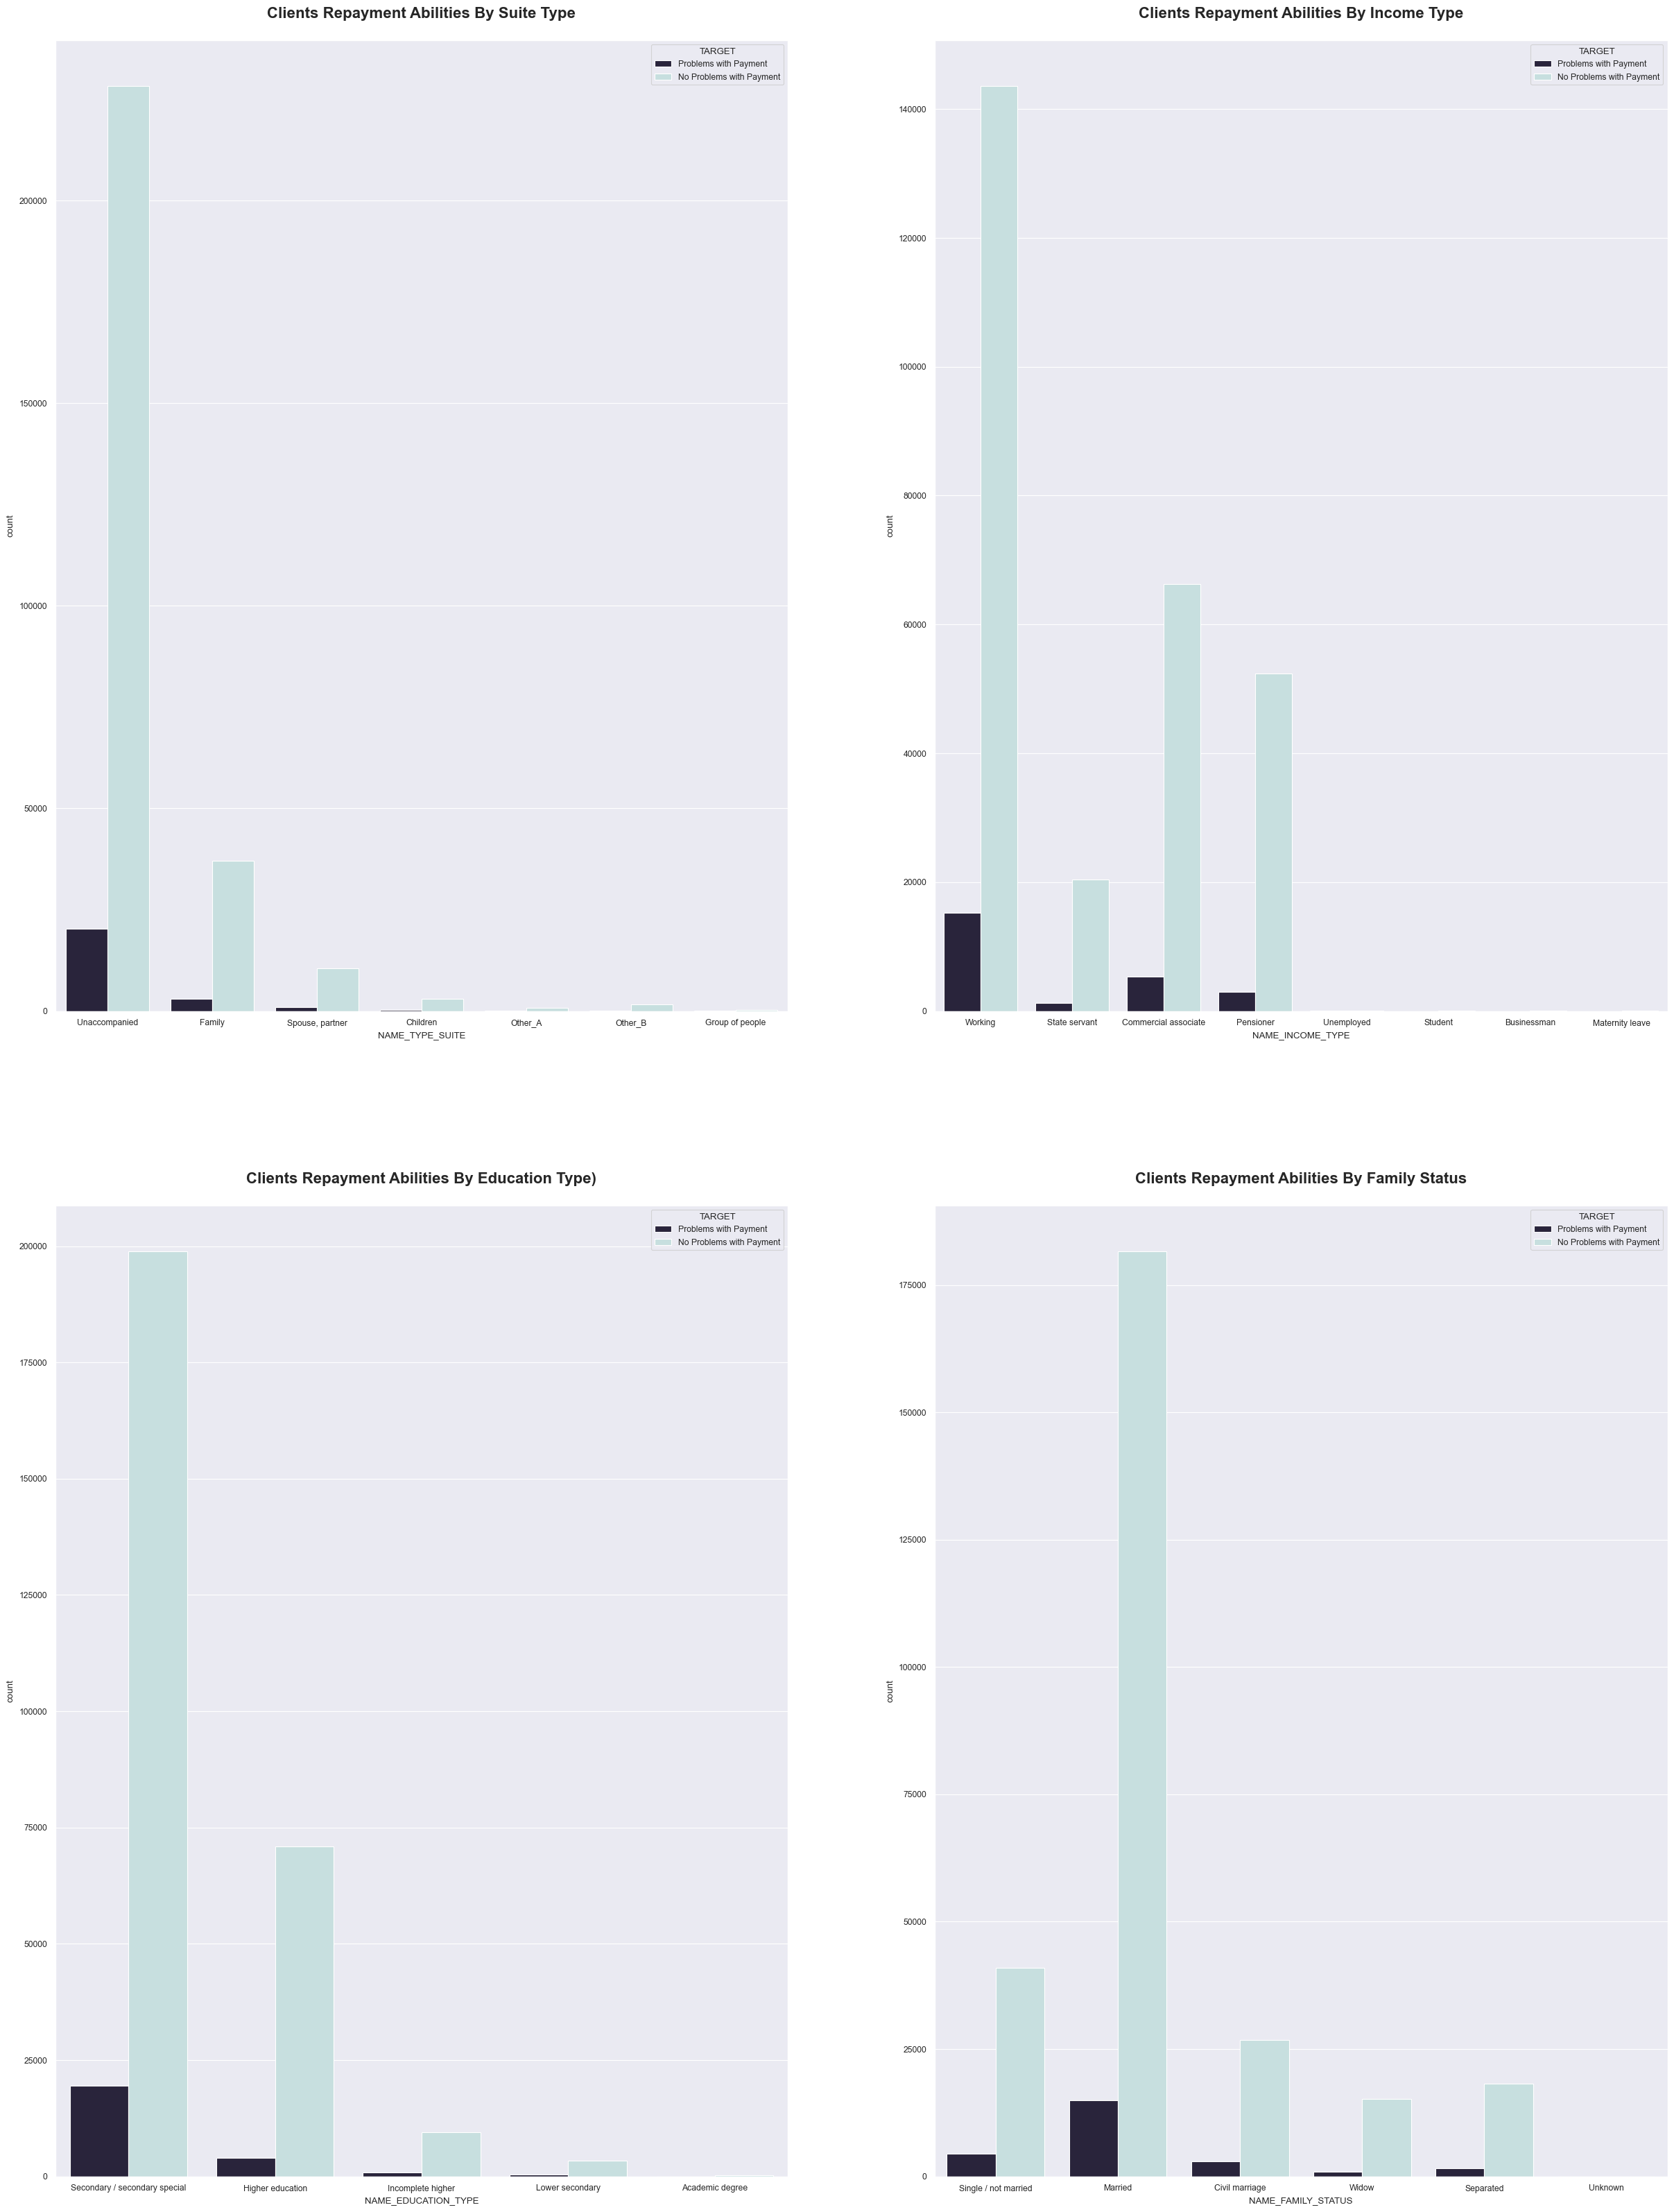

In [21]:
# Visualization 2
sns.set_style('darkgrid')
fig, ax = plt.subplots(2,2, figsize=(30,40))
sns.set_context('paper', font_scale=1)

ax[0][0].set_title('Clients Repayment Abilities By Suite Type\n', fontweight='bold', fontsize=16)
sns.countplot(x='NAME_TYPE_SUITE', data = train, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[0][0])

ax[0][1].set_title('Clients Repayment Abilities By Income Type\n', fontweight='bold', fontsize=16)
sns.countplot(x='NAME_INCOME_TYPE', data = train, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[0][1])

ax[1][0].set_title('\nClients Repayment Abilities By Education Type)\n', fontweight='bold', fontsize=16)
sns.countplot(x='NAME_EDUCATION_TYPE', data = train, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[1][0])

ax[1][1].set_title('\nClients Repayment Abilities By Family Status\n', fontweight='bold', fontsize=16)
sns.countplot(x='NAME_FAMILY_STATUS', data = train, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[1][1])

#### Suite Type VS Target

In [22]:
suite_type = train.groupby(by=['NAME_TYPE_SUITE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Ability to Pay Based on Type of Suite Type')
suite_type.sort_values(by='SK_ID_CURR', ascending=False)
suite_type.style.background_gradient(cmap='Purples')

Clients Ability to Pay Based on Type of Suite Type


,NAME_TYPE_SUITE,TARGET,SK_ID_CURR
0,Children,No Problems with Payment,3026
1,Children,Problems with Payment,241
2,Family,No Problems with Payment,37140
3,Family,Problems with Payment,3009
4,Group of people,No Problems with Payment,248
5,Group of people,Problems with Payment,23
6,Other_A,No Problems with Payment,790
7,Other_A,Problems with Payment,76
8,Other_B,No Problems with Payment,1596
9,Other_B,Problems with Payment,174


In [23]:
dataset_train[['NAME_TYPE_SUITE','TARGET']].groupby(['NAME_TYPE_SUITE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_TYPE_SUITE,TARGET
4,Other_B,0.098305
3,Other_A,0.087760
2,Group of people,0.084871
6,Unaccompanied,0.081830
5,"Spouse, partner",0.078716
1,Family,0.074946
0,Children,0.073768


Customers who apply for a loan with other_b have a higher chance of having trouble paying it back (about 10%).

#### Income Type VS Target

In [24]:
income_type = train.groupby(by=['NAME_INCOME_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Ability to Pay Based on Type of Income Type')
income_type.sort_values(by='SK_ID_CURR', ascending=False)
income_type.style.background_gradient(cmap='Purples')

Clients Ability to Pay Based on Type of Income Type


,NAME_INCOME_TYPE,TARGET,SK_ID_CURR
0,Businessman,No Problems with Payment,10
1,Commercial associate,No Problems with Payment,66257
2,Commercial associate,Problems with Payment,5360
3,Maternity leave,No Problems with Payment,3
4,Maternity leave,Problems with Payment,2
5,Pensioner,No Problems with Payment,52380
6,Pensioner,Problems with Payment,2982
7,State servant,No Problems with Payment,20454
8,State servant,Problems with Payment,1249
9,Student,No Problems with Payment,18


In [25]:
dataset_train[['NAME_INCOME_TYPE','TARGET']].groupby(['NAME_INCOME_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_INCOME_TYPE,TARGET
2,Maternity leave,0.400000
6,Unemployed,0.363636
7,Working,0.095885
1,Commercial associate,0.074843
4,State servant,0.057550
3,Pensioner,0.053864
0,Businessman,0.000000
5,Student,0.000000


There are about 158,774 loan applications, and it can be seen that most of them come from people who have jobs and make money. People with the income types of businessman and student don't have any trouble paying back their loans.

#### Education Type VS Target

In [26]:
education_type = train.groupby(by=['NAME_EDUCATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Ability to Pay Based on Type of Education Type')
education_type.sort_values(by='SK_ID_CURR', ascending=False)
education_type.style.background_gradient(cmap='Purples')

Clients Ability to Pay Based on Type of Education Type


,NAME_EDUCATION_TYPE,TARGET,SK_ID_CURR
0,Academic degree,No Problems with Payment,161
1,Academic degree,Problems with Payment,3
2,Higher education,No Problems with Payment,70854
3,Higher education,Problems with Payment,4009
4,Incomplete higher,No Problems with Payment,9405
5,Incomplete higher,Problems with Payment,872
6,Lower secondary,No Problems with Payment,3399
7,Lower secondary,Problems with Payment,417
8,Secondary / secondary special,No Problems with Payment,198867
9,Secondary / secondary special,Problems with Payment,19524


In [27]:
dataset_train[['NAME_EDUCATION_TYPE','TARGET']].groupby(['NAME_EDUCATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_EDUCATION_TYPE,TARGET
3,Lower secondary,0.109277
4,Secondary / secondary special,0.089399
2,Incomplete higher,0.084850
1,Higher education,0.053551
0,Academic degree,0.018293


Text(0.5, 0, '\nFamily Status')

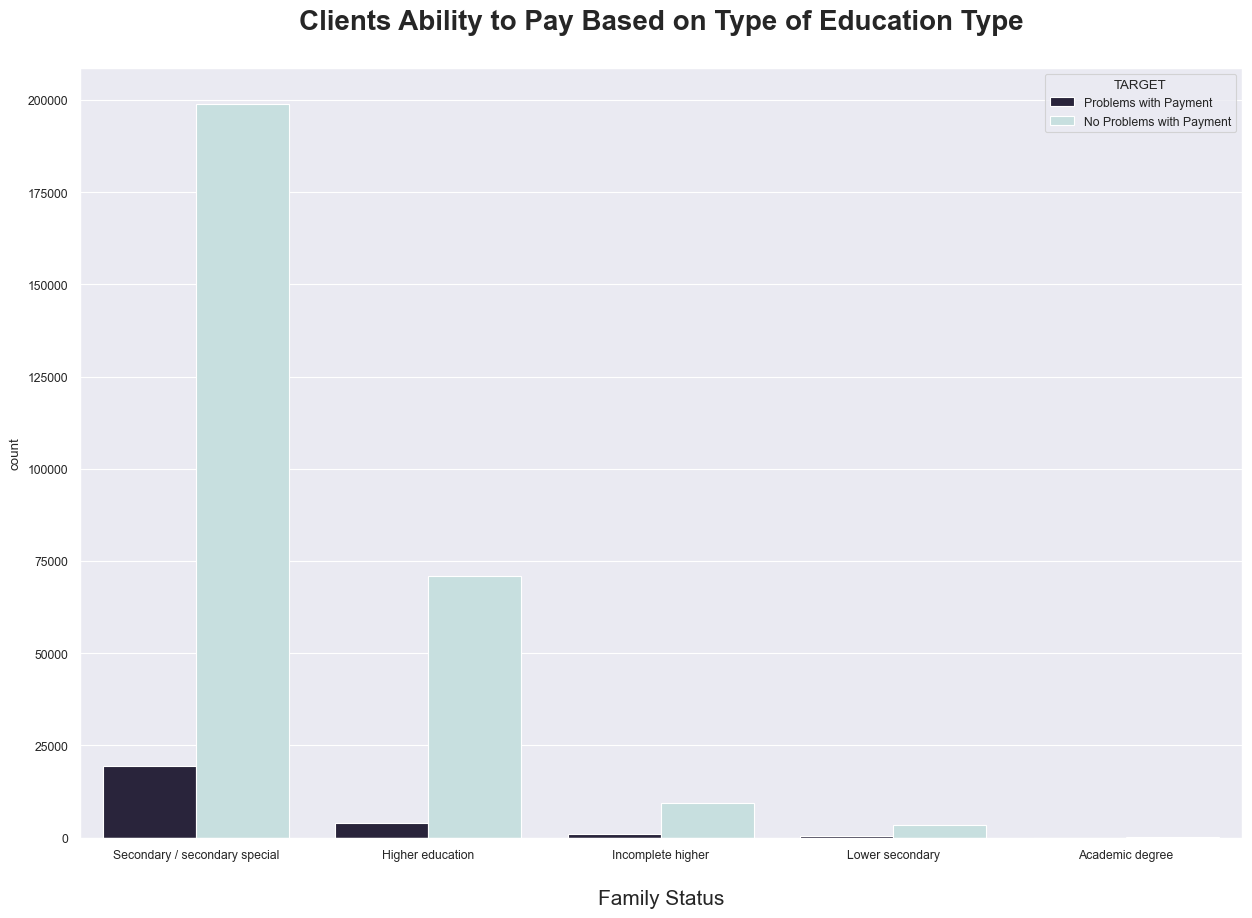

In [28]:
# visualization
plt.figure(figsize=(15,10))
fig = sns.countplot(x='NAME_EDUCATION_TYPE', data = train, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r')
plt.title('Clients Ability to Pay Based on Type of Education Type\n', fontweight='bold', fontsize=20)
plt.xlabel('\nFamily Status', fontsize=15)

Many applications are sent in by people with only a secondary education (218K), followed by people with more education (75K). It can be seen, though, that clients with a lower secondary education have the highest rate (around 10%) of TARGET = 1, which means they are having trouble paying back the loans.

#### Family Status VS Target

In [29]:
family_status = train.groupby(by=['NAME_FAMILY_STATUS','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Ability to Pay Based on Type of Family Status')
family_status.sort_values(by='SK_ID_CURR', ascending=False)
family_status.style.background_gradient(cmap='Purples')

Clients Ability to Pay Based on Type of Family Status


,NAME_FAMILY_STATUS,TARGET,SK_ID_CURR
0,Civil marriage,No Problems with Payment,26814
1,Civil marriage,Problems with Payment,2961
2,Married,No Problems with Payment,181582
3,Married,Problems with Payment,14850
4,Separated,No Problems with Payment,18150
5,Separated,Problems with Payment,1620
6,Single / not married,No Problems with Payment,40987
7,Single / not married,Problems with Payment,4457
8,Unknown,No Problems with Payment,2
9,Widow,No Problems with Payment,15151


In [30]:
dataset_train[['NAME_FAMILY_STATUS','TARGET']].groupby(['NAME_FAMILY_STATUS'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_FAMILY_STATUS,TARGET
0,Civil marriage,0.099446
3,Single / not married,0.098077
2,Separated,0.081942
1,Married,0.075599
5,Widow,0.058242
4,Unknown,0.000000


Text(0.5, 0, '\nFamily Status')

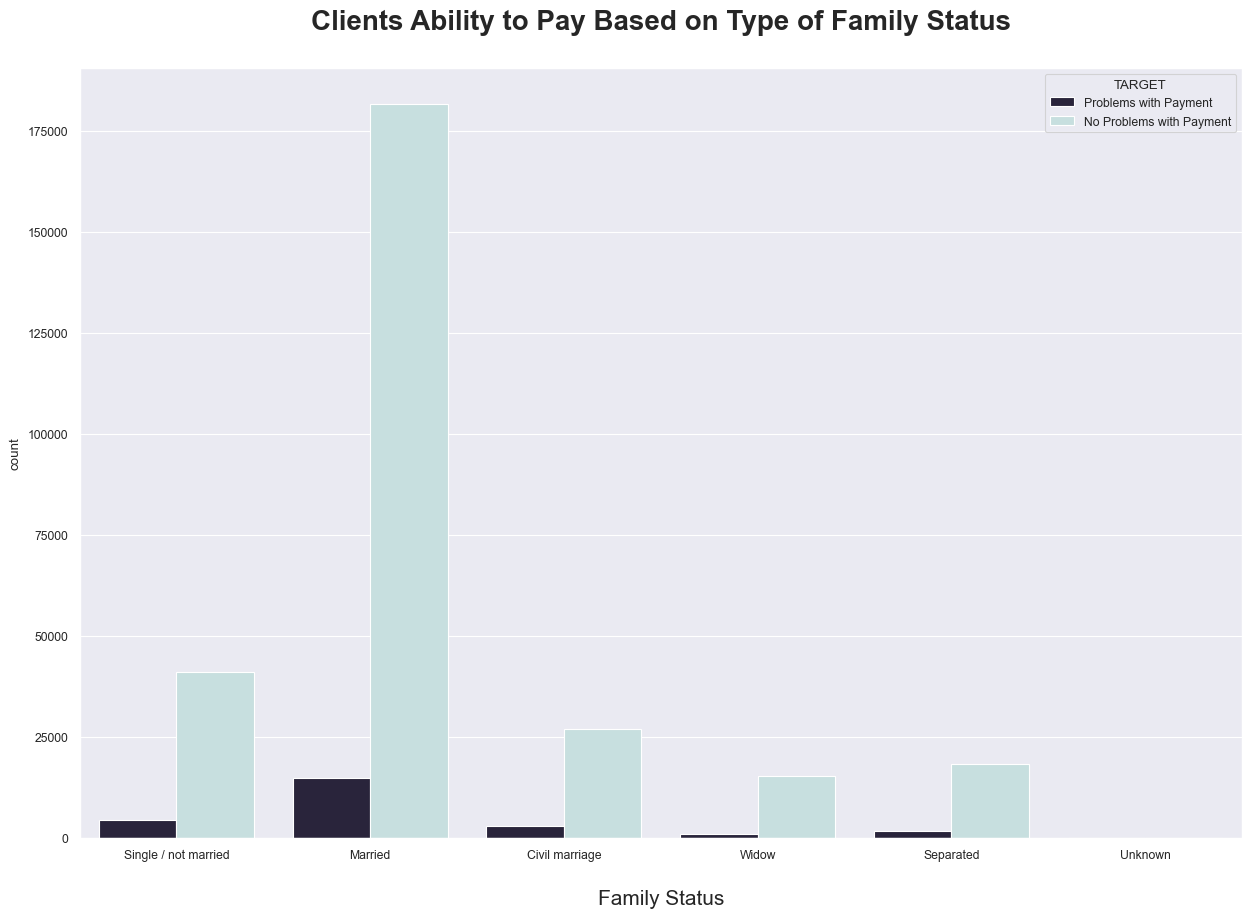

In [31]:
# visualization
plt.figure(figsize=(15,10))
fig = sns.countplot(x='NAME_FAMILY_STATUS', data = train, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r')
plt.title('Clients Ability to Pay Based on Type of Family Status\n', fontweight='bold', fontsize=20)
plt.xlabel('\nFamily Status', fontsize=15)

There are about 196,432 loan applications, and most of them come from married people. About 9% of clients who are civilly married or single have trouble paying back their loans.

### Housing Type, Occupation Type, Process Day, and Organization Type

#### Housing Type Vs Target

In [32]:
ht = train.groupby(by=['NAME_HOUSING_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Ability to Pay Based on Type of Housing Type')
ht.sort_values(by='SK_ID_CURR', ascending=False)
ht.style.background_gradient(cmap='Purples')

Clients Ability to Pay Based on Type of Housing Type


,NAME_HOUSING_TYPE,TARGET,SK_ID_CURR
0,Co-op apartment,No Problems with Payment,1033
1,Co-op apartment,Problems with Payment,89
2,House / apartment,No Problems with Payment,251596
3,House / apartment,Problems with Payment,21272
4,Municipal apartment,No Problems with Payment,10228
5,Municipal apartment,Problems with Payment,955
6,Office apartment,No Problems with Payment,2445
7,Office apartment,Problems with Payment,172
8,Rented apartment,No Problems with Payment,4280
9,Rented apartment,Problems with Payment,601


In [33]:
dataset_train[['NAME_HOUSING_TYPE','TARGET']].groupby(['NAME_HOUSING_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_HOUSING_TYPE,TARGET
4,Rented apartment,0.123131
5,With parents,0.116981
2,Municipal apartment,0.085397
0,Co-op apartment,0.079323
1,House / apartment,0.077957
3,Office apartment,0.065724


Customers who live in rented apartments have the most trouble paying back their loans (12%).

Text(0.5, 0, '\nHousing Type')

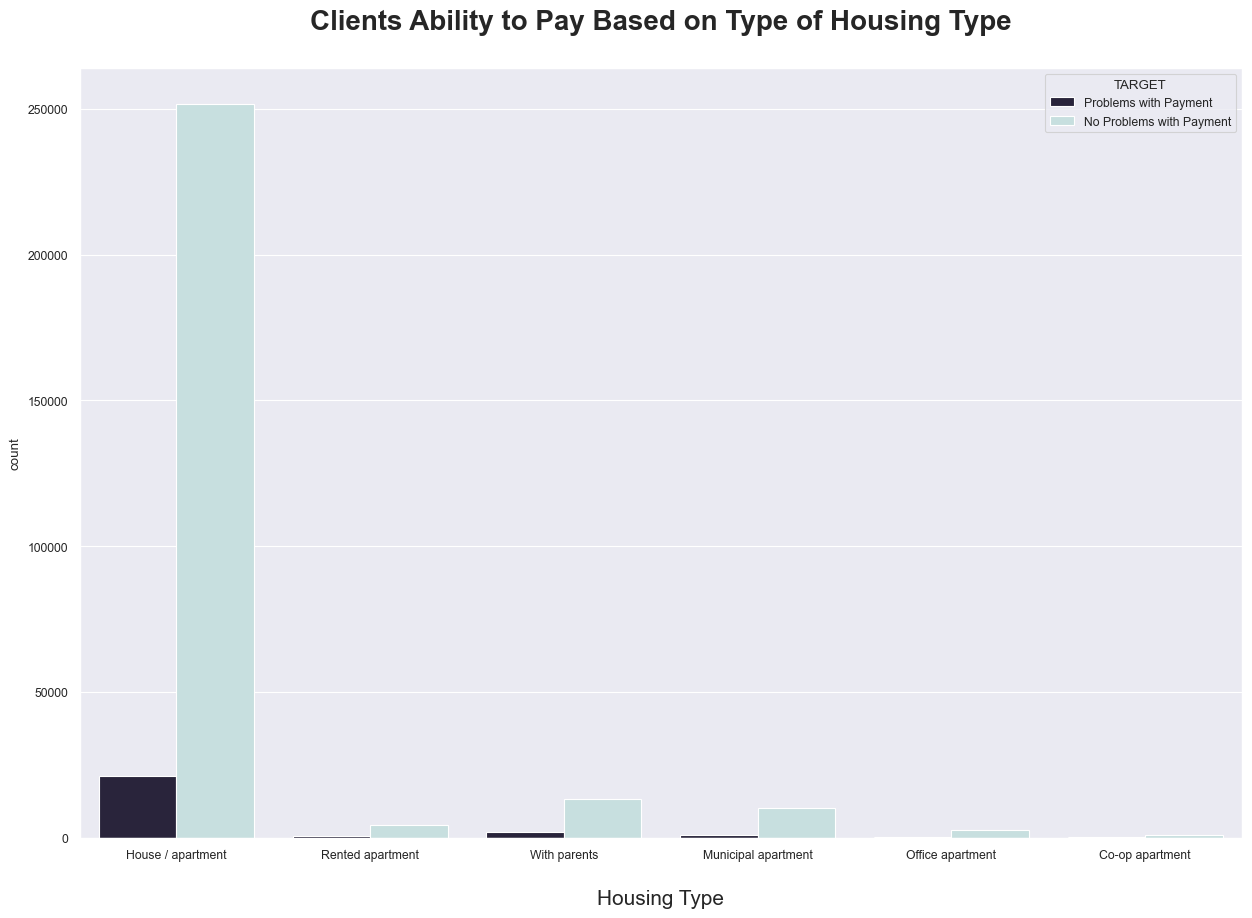

In [34]:
# visualization
plt.figure(figsize=(15,10))
fig = sns.countplot(x='NAME_HOUSING_TYPE', data = train, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r')
plt.title('Clients Ability to Pay Based on Type of Housing Type\n', fontweight='bold', fontsize=20)
plt.xlabel('\nHousing Type', fontsize=15)

#### Occupation Type VS Target

In [35]:
ot = train.groupby(by=['OCCUPATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Ability to Pay Based on Type of Occupation Type')
ot.sort_values(by='SK_ID_CURR', ascending=False)
ot.style.background_gradient(cmap='Purples')

Clients Ability to Pay Based on Type of Occupation Type


,OCCUPATION_TYPE,TARGET,SK_ID_CURR
0,Accountants,No Problems with Payment,9339
1,Accountants,Problems with Payment,474
2,Cleaning staff,No Problems with Payment,4206
3,Cleaning staff,Problems with Payment,447
4,Cooking staff,No Problems with Payment,5325
5,Cooking staff,Problems with Payment,621
6,Core staff,No Problems with Payment,25832
7,Core staff,Problems with Payment,1738
8,Drivers,No Problems with Payment,16496
9,Drivers,Problems with Payment,2107


In [36]:
dataset_train[['OCCUPATION_TYPE','TARGET']].groupby(['OCCUPATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,OCCUPATION_TYPE,TARGET
9,Low-skill Laborers,0.171524
4,Drivers,0.113261
17,Waiters/barmen staff,0.112760
16,Security staff,0.107424
8,Laborers,0.105788
2,Cooking staff,0.104440
14,Sales staff,0.096318
1,Cleaning staff,0.096067
13,Realty agents,0.078562
15,Secretaries,0.070498


55K applications are sent in by people who work as Labourers. It can be seen that clients whose job type is "Low-skilled Labourers" have the highest percentage (about 17%) of TARGET = 1, which means they are having trouble paying back the loans.

#### Process Day VS Target

In [37]:
pt = train.groupby(by=['WEEKDAY_APPR_PROCESS_START','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Ability to Pay Based on Type of Process Day')
pt.sort_values(by='SK_ID_CURR', ascending=False)
pt.style.background_gradient(cmap='Purples')

Clients Ability to Pay Based on Type of Process Day


,WEEKDAY_APPR_PROCESS_START,TARGET,SK_ID_CURR
0,FRIDAY,No Problems with Payment,46237
1,FRIDAY,Problems with Payment,4101
2,MONDAY,No Problems with Payment,46780
3,MONDAY,Problems with Payment,3934
4,SATURDAY,No Problems with Payment,31182
5,SATURDAY,Problems with Payment,2670
6,SUNDAY,No Problems with Payment,14898
7,SUNDAY,Problems with Payment,1283
8,THURSDAY,No Problems with Payment,46493
9,THURSDAY,Problems with Payment,4098


In [38]:
dataset_train[['WEEKDAY_APPR_PROCESS_START','TARGET']].groupby(['WEEKDAY_APPR_PROCESS_START'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,WEEKDAY_APPR_PROCESS_START,TARGET
5,TUESDAY,0.083505
6,WEDNESDAY,0.081604
0,FRIDAY,0.081469
4,THURSDAY,0.081003
3,SUNDAY,0.079291
2,SATURDAY,0.078873
1,MONDAY,0.077572


Text(0.5, 0, '\nProcess Day')

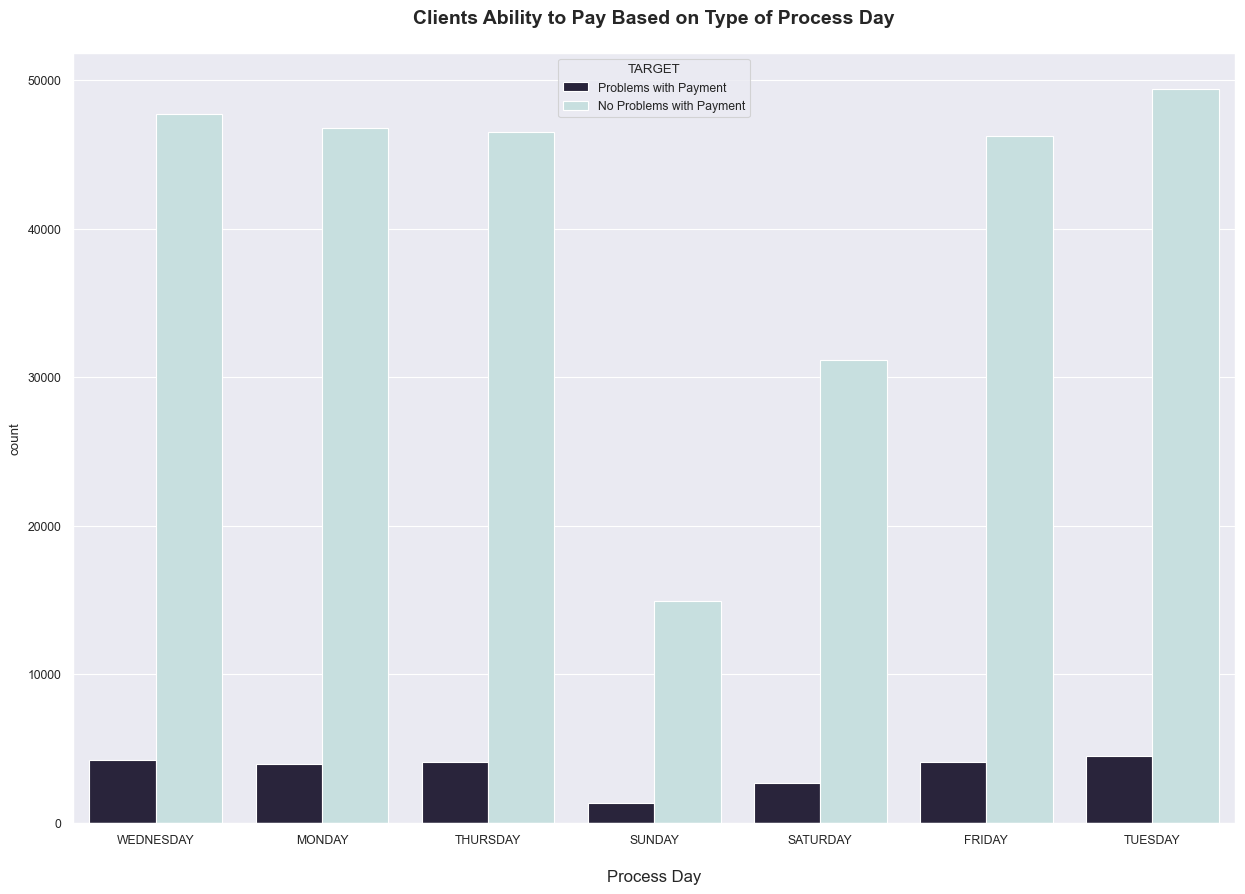

In [39]:
# visualization
plt.figure(figsize=(15,10))
fig = sns.countplot(x='WEEKDAY_APPR_PROCESS_START', data = train, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r')
plt.title('Clients Ability to Pay Based on Type of Process Day\n', fontweight='bold', fontsize=14)
plt.xlabel('\nProcess Day', fontsize=12)

##### It's clear that almost the same number of people (about 7% to 8%) have TARGET = 1, which means they are having trouble paying back their loans, every day that applications are processed.

#### Organization Type Vs Target

In [40]:
ot = train.groupby(by=['ORGANIZATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Ability to Pay Based on Type of Suite Type')
ot.sort_values(by='SK_ID_CURR', ascending=False)
ot.style.background_gradient(cmap='Purples')

Clients Ability to Pay Based on Type of Suite Type


,ORGANIZATION_TYPE,TARGET,SK_ID_CURR
0,Advertising,No Problems with Payment,394
1,Advertising,Problems with Payment,35
2,Agriculture,No Problems with Payment,2197
3,Agriculture,Problems with Payment,257
4,Bank,No Problems with Payment,2377
5,Bank,Problems with Payment,130
6,Business Entity Type 1,No Problems with Payment,5497
7,Business Entity Type 1,Problems with Payment,487
8,Business Entity Type 2,No Problems with Payment,9653
9,Business Entity Type 2,Problems with Payment,900


In [41]:
dataset_train[['ORGANIZATION_TYPE','TARGET']].groupby(['ORGANIZATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,ORGANIZATION_TYPE,TARGET
54,Transport: type 3,0.157540
18,Industry: type 13,0.134328
25,Industry: type 8,0.125000
38,Restaurant,0.117062
7,Construction,0.116798
6,Cleaning,0.111538
14,Industry: type 1,0.110683
20,Industry: type 3,0.106162
36,Realtor,0.106061
1,Agriculture,0.104727


It is clear that clients with organisation type of transport: type 3 have the highest rate (about 15%) of TARGET = 1, which means they are having trouble paying back the loans.

### Numerical Features VS Target

#### Amount Credit of the Loan VS Target

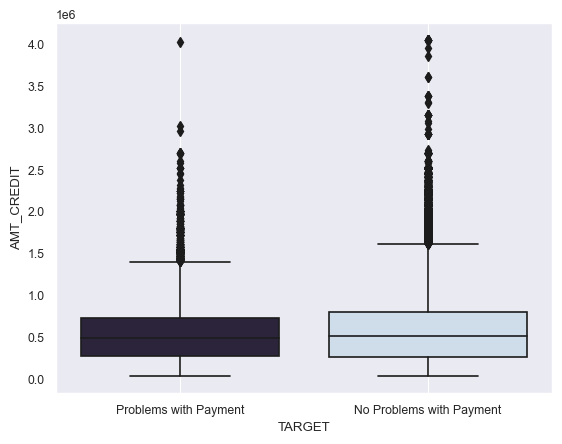

In [42]:
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=train, palette = 'ch:start=0.2,rot=-.2_r')
plt.grid()
plt.show()

It is clear that the median value of the credit amount for clients who aren't having trouble making payments is a little higher than the median value for clients who are having trouble making payments. This means that customers who borrow more money have a slightly better chance of being able to pay it back than customers who borrow less money.

#### Amount Income VS Target

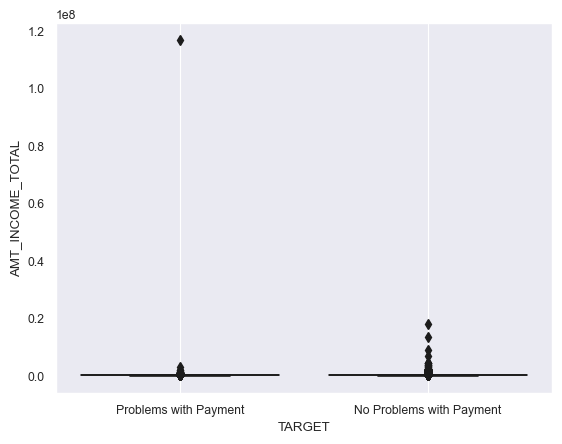

In [43]:
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=train, palette = 'ch:start=0.2,rot=-.2_r')
plt.grid()
plt.show()

It's clear that clients who are having trouble making payments and clients who aren't having trouble making payments are mostly worth the same. Nevertheless, as the client's income rises, so does the chance that they will be able to repay the loan without any problems.

#### Age VS target

In [44]:
no_age = dataset_train[dataset_train['TARGET']==0]['DAYS_BIRTH'].values/-365
yes_age = dataset_train[dataset_train['TARGET']==1]['DAYS_BIRTH'].values/-365

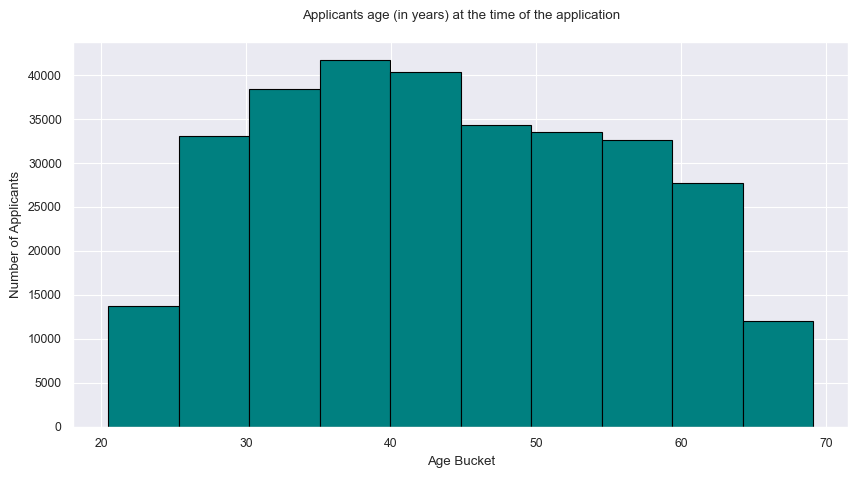

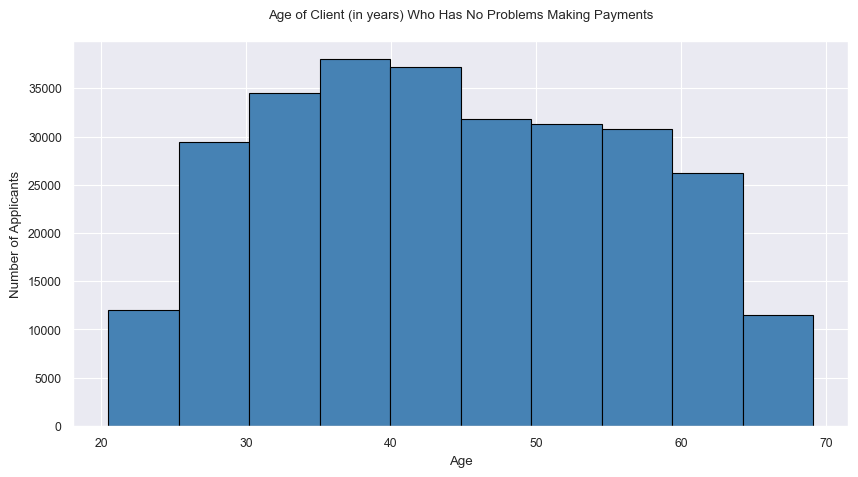

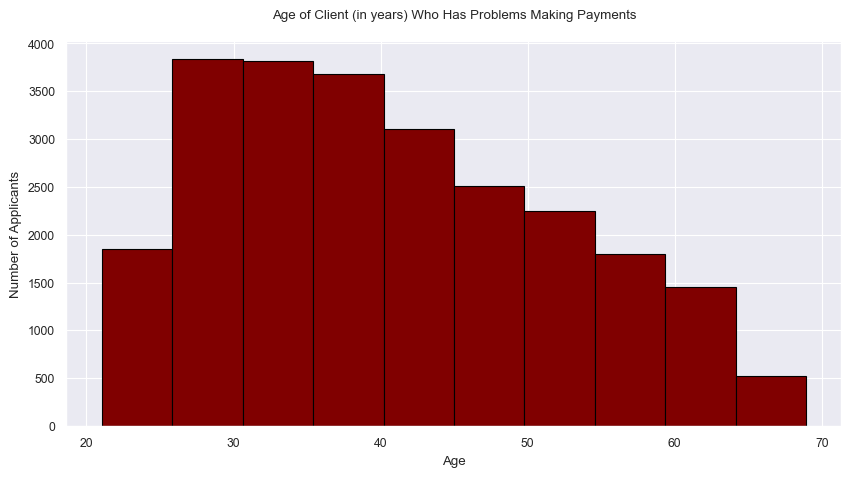

In [45]:
plt.figure(figsize=(10,5))
plt.hist(dataset_train['DAYS_BIRTH'].values/-365, bins=10, edgecolor='black', color='teal')
plt.title('Applicants age (in years) at the time of the application\n')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Applicants')
plt.show()

plt.figure(figsize=(10,5))
plt.hist(no_age, bins=10, edgecolor='black', color='steelblue')
plt.title('Age of Client (in years) Who Has No Problems Making Payments\n')
plt.xlabel('Age')
plt.ylabel('Number of Applicants')
plt.show()

plt.figure(figsize=(10,5))
plt.hist(yes_age, bins=10, edgecolor='black', color='maroon')
plt.title('Age of Client (in years) Who Has Problems Making Payments\n')
plt.xlabel('Age')
plt.ylabel('Number of Applicants')
plt.show()

Most people who apply for loans are between the ages of 35 and 40. People between the ages of 40 and 45 come in second. On the other hand, there aren't many people applying to be clients under 25 or over 65. People in the age range of 35 to 45 who don't have any trouble making payments are clients. While clients who are having trouble making payments are usually between the ages of 25 and 35.

### Visualisation of Multiple Factors

#### Grouped by Realty Ownership Status

###### A) Car Ownership Status, The Number of Children, Target, and House/Flat Ownership Status

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


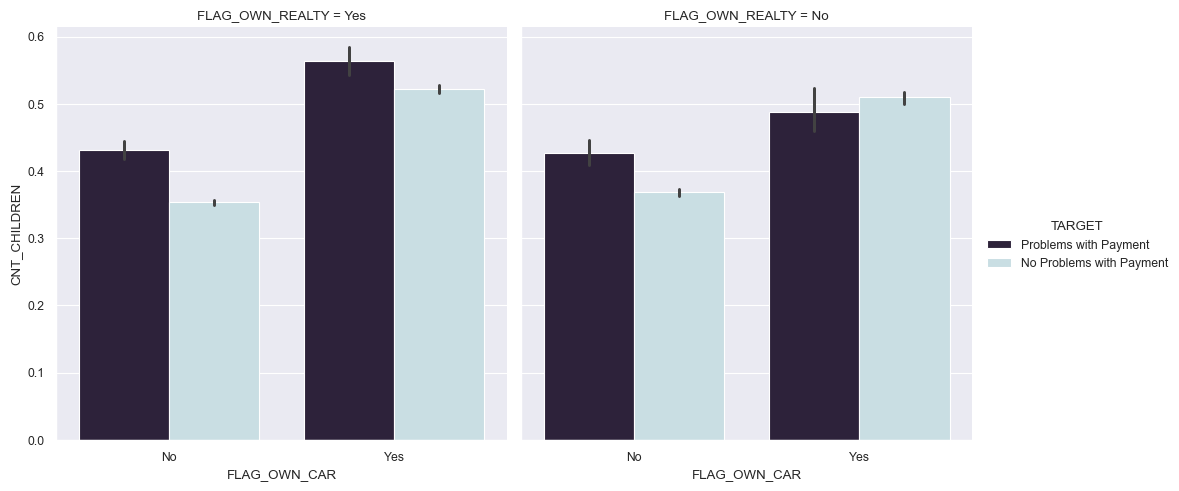

In [46]:
sns.catplot(x = 'FLAG_OWN_CAR',
            y = 'CNT_CHILDREN', 
            hue = 'TARGET', 
            col = 'FLAG_OWN_REALTY', 
            kind = 'bar', palette = 'ch:start=0.3,rot=-.3_r',
            data = train)
plt.show()

A lot more clients who own both a car and a house or flat have trouble paying back their child loans than clients who don't own houses or flats.

###### B) Income Type, Amount of Goods Price, Target, and House/Flat Ownership Status

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


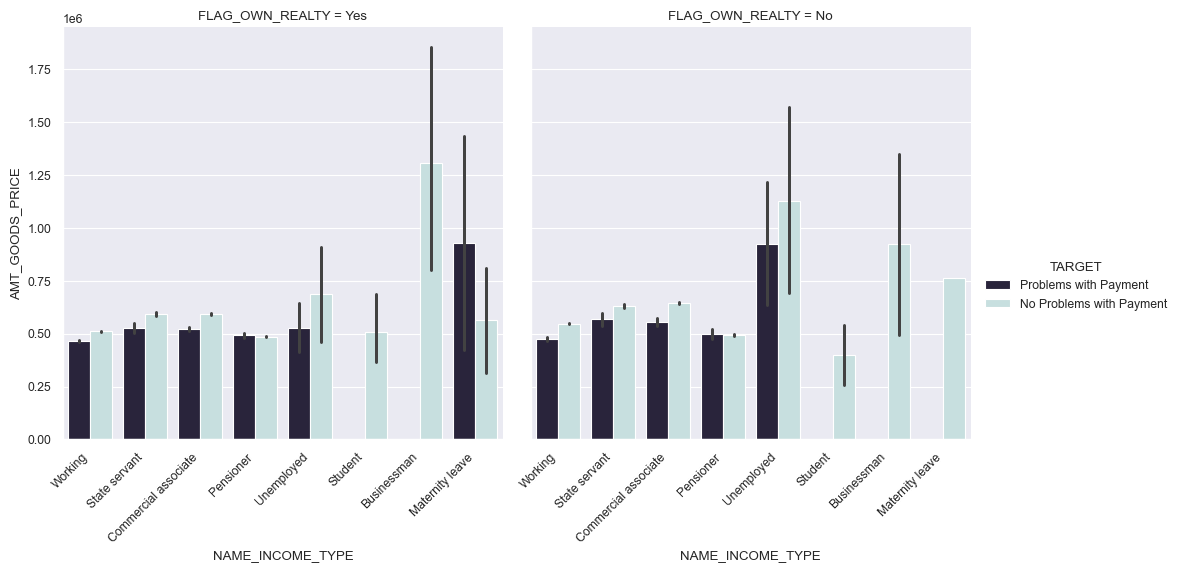

In [47]:
fig = sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_GOODS_PRICE', 
            hue = 'TARGET', 
            col = 'FLAG_OWN_REALTY', 
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

People who have FLAG_OWN_REALTY = Yes (i.e. own a house or flat) have a harder time paying back their loans than people who have FLAG_OWN_REALTY = No (i.e. do not own a house or flat).

###### C) Family Status, Amount of Income, Target, and House/Flat Ownership Status

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


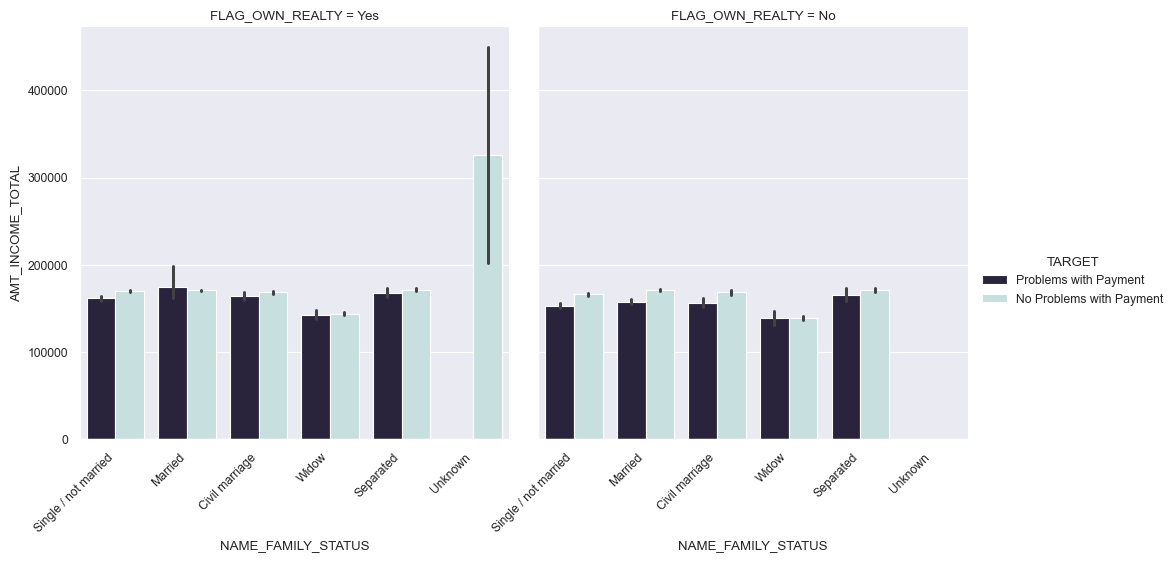

In [48]:
fig = sns.catplot(x = 'NAME_FAMILY_STATUS',
            y = 'AMT_INCOME_TOTAL', 
            hue = 'TARGET', 
            col = 'FLAG_OWN_REALTY', 
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

In [49]:
train.groupby(by=['NAME_FAMILY_STATUS','FLAG_OWN_REALTY', 'TARGET'], as_index=False)['AMT_INCOME_TOTAL'].mean()

,NAME_FAMILY_STATUS,FLAG_OWN_REALTY,TARGET,AMT_INCOME_TOTAL
0,Civil marriage,No,No Problems with Payment,168536.777268
1,Civil marriage,No,Problems with Payment,156693.366523
2,Civil marriage,Yes,No Problems with Payment,168476.458185
3,Civil marriage,Yes,Problems with Payment,164301.462106
4,Married,No,No Problems with Payment,171091.299446
5,Married,No,Problems with Payment,158015.694066
6,Married,Yes,No Problems with Payment,171129.614770
7,Married,Yes,Problems with Payment,174888.788155
8,Separated,No,No Problems with Payment,171421.821114
9,Separated,No,Problems with Payment,165808.993458


If a client is married and owns a house or flat (FLAG_OWN_REALTY = Yes), they have a harder time paying back their loans than if they don't own a house or flat (FLAG_OWN_REALTY = No).

#### Grouped by Car Ownership Type

###### Contract Type, The Number of Children, Target, and Car Ownership Status

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


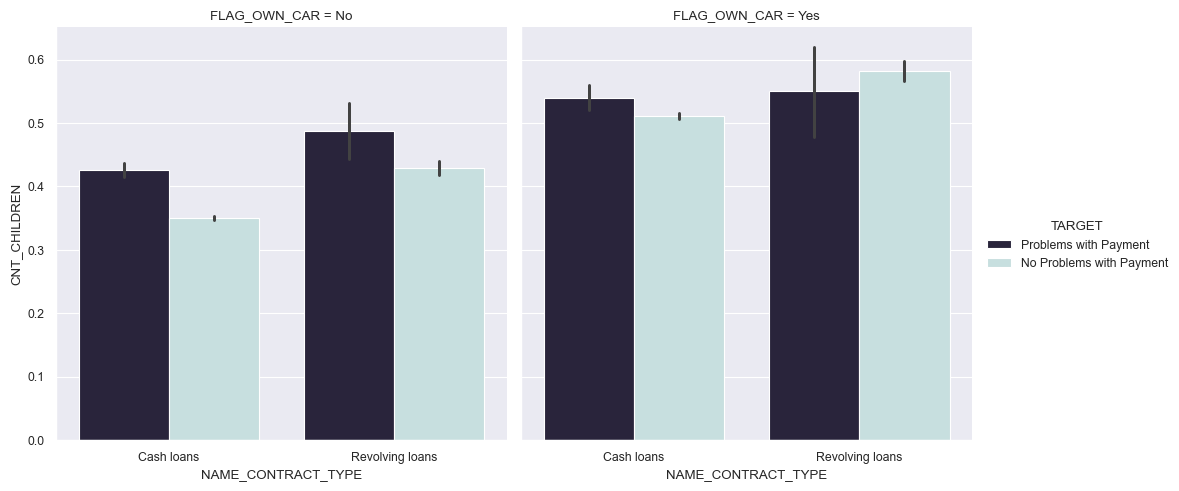

In [50]:
sns.catplot(x = 'NAME_CONTRACT_TYPE',
            y = 'CNT_CHILDREN', 
            hue = 'TARGET', 
            col = 'FLAG_OWN_CAR', 
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = train)
plt.show()

It's harder to pay back revolving loans when FLAG_OWN_CAR = No (that is, you don't own a car) than when FLAG_OWN_CAR = Yes (that is, you do own a car).

#### Grouped by Contract Type

##### A) Income Type, Amount of Credit, Target, and Contract Type

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


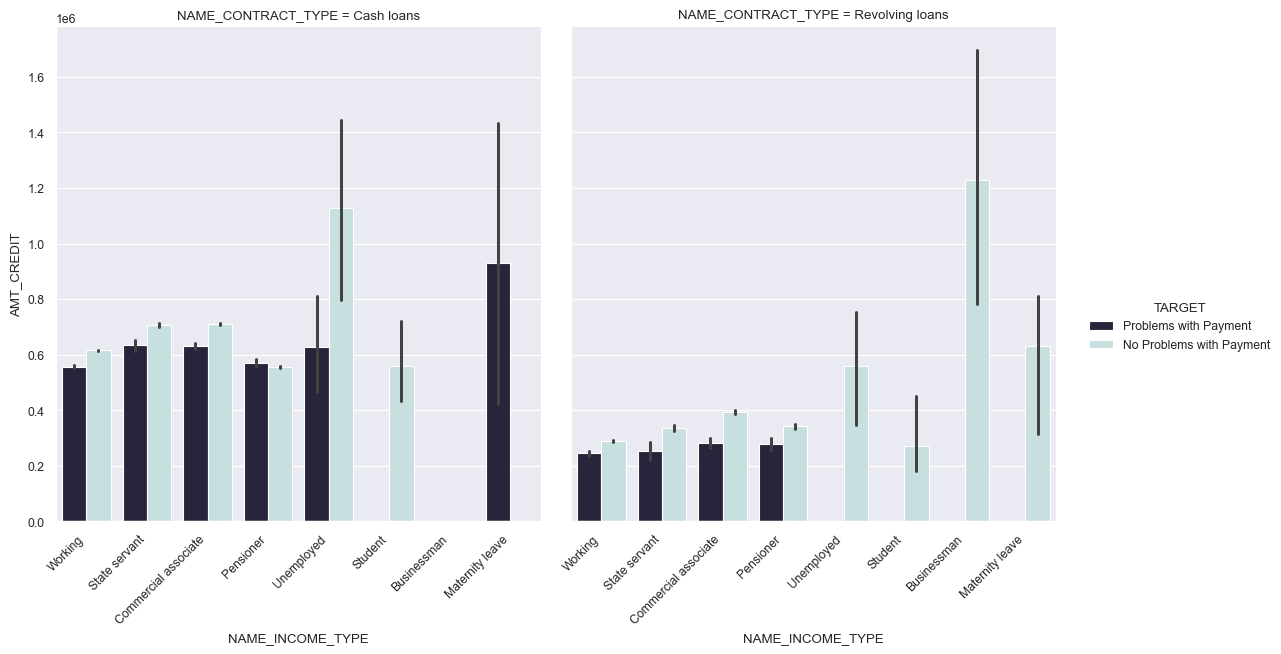

In [51]:
fig = sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'NAME_CONTRACT_TYPE', 
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.gcf().set_size_inches(13, 6)
plt.show()

In [52]:
train.groupby(by=['NAME_INCOME_TYPE','NAME_CONTRACT_TYPE', 'TARGET'], as_index=False)['AMT_CREDIT'].mean()

,NAME_INCOME_TYPE,NAME_CONTRACT_TYPE,TARGET,AMT_CREDIT
0,Businessman,Revolving loans,No Problems with Payment,1.228500e+06
1,Commercial associate,Cash loans,No Problems with Payment,7.114464e+05
2,Commercial associate,Cash loans,Problems with Payment,6.315081e+05
3,Commercial associate,Revolving loans,No Problems with Payment,3.933160e+05
4,Commercial associate,Revolving loans,Problems with Payment,2.806419e+05
5,Maternity leave,Cash loans,Problems with Payment,9.292500e+05
6,Maternity leave,Revolving loans,No Problems with Payment,6.300000e+05
7,Pensioner,Cash loans,No Problems with Payment,5.547979e+05
8,Pensioner,Cash loans,Problems with Payment,5.718242e+05
9,Pensioner,Revolving loans,No Problems with Payment,3.417436e+05


When people take maternity leave and borrow money for it through cash loans, they all have trouble paying back loans for medium-sized amounts. All of our clients who have revolving loans or maternity leaves have no trouble paying them back. More than half of unemployed people who get cash loans have trouble paying them back, even if the loans are for medium amounts. While all of our unemployed clients who have revolving loans have no trouble paying them back. All of our student clients have no trouble paying back their loans, whether they get a cash loan or a revolving loan for a low to medium sum of money.

#### Grouped by Rating of Region where Client Lives

##### A) Housing Type, Amount Credit of Loan, Target, and Rating of Region where Client Lives

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


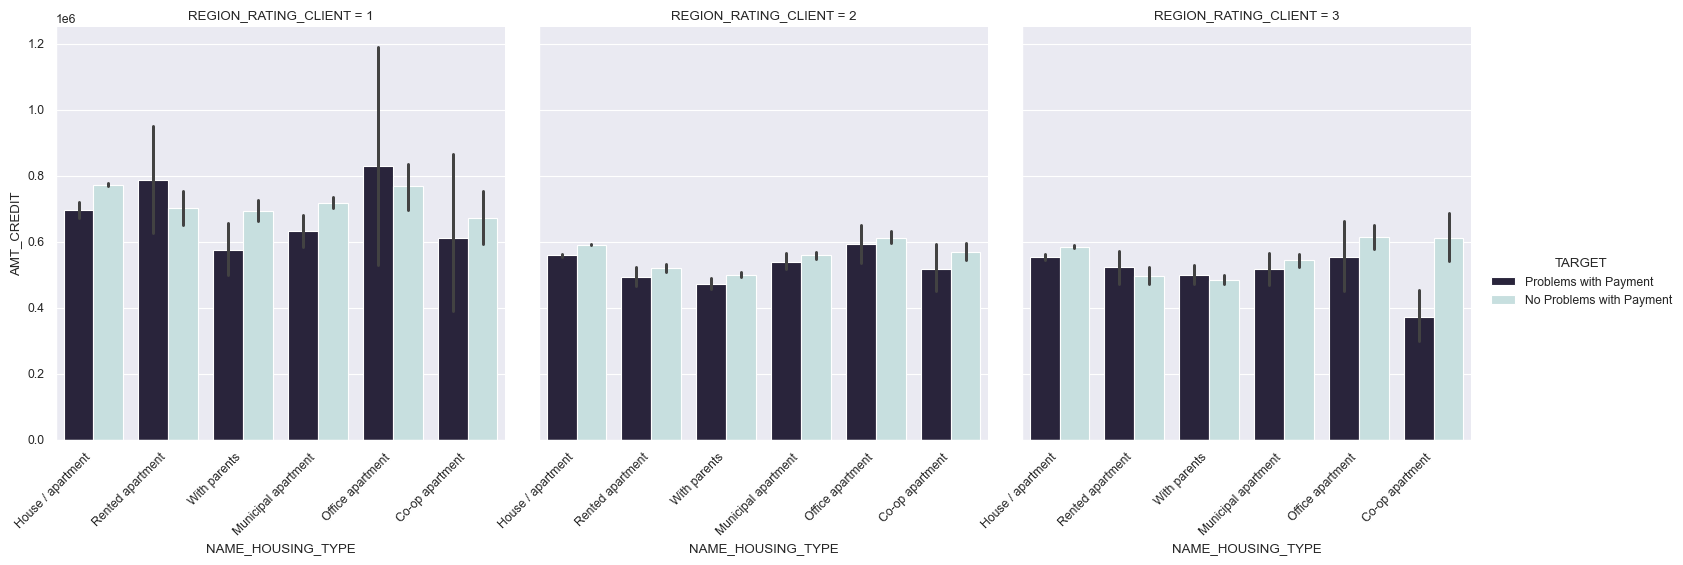

In [53]:
fig = sns.catplot(x = 'NAME_HOUSING_TYPE',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'REGION_RATING_CLIENT', 
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

A client with a rating of 1 who lives in a rented apartment or an office apartment has a harder time paying back loans than a client with a rating of 2 who takes out a medium-sized loan.

##### B) Education Type, Amount Credit of Loan, Target, and Rating of Region where Client Lives

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


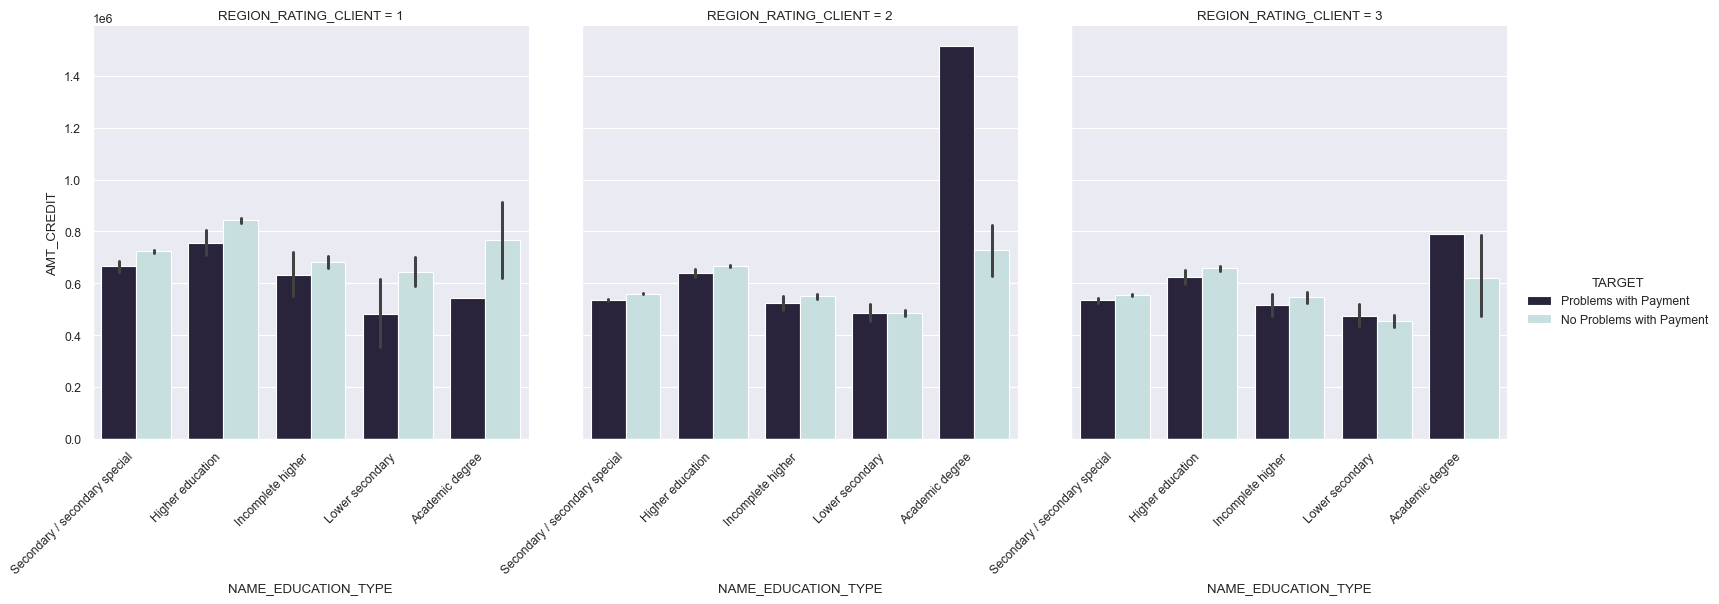

In [54]:
fig = sns.catplot(x = 'NAME_EDUCATION_TYPE',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'REGION_RATING_CLIENT', 
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

For clients with a college degree who live in a region with a rating of 2, it can be hard to pay back loans for larger amounts. And a client with the same degree who lives in a region with a rating of 3 has trouble paying back loans for a medium amount.

## Data Cleaning

### Detecting Missing Values

In [55]:
# Find elements that are empty
print('Missing values status:', dataset_train.isnull().values.any())
mv = pd.DataFrame(dataset_train.isnull().sum(), columns=['Total Missing Values'])
mv['%'] = (mv['Total Missing Values']/dataset_train.shape[0])*100
mv.sort_values(by=['%'], ascending=False).reset_index()

Missing values status: True


,index,Total Missing Values,%
0,COMMONAREA_MEDI,214865,69.872297
1,COMMONAREA_AVG,214865,69.872297
2,COMMONAREA_MODE,214865,69.872297
3,NONLIVINGAPARTMENTS_MODE,213514,69.432963
4,NONLIVINGAPARTMENTS_AVG,213514,69.432963
5,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
6,FONDKAPREMONT_MODE,210295,68.386172
7,LIVINGAPARTMENTS_MODE,210199,68.354953
8,LIVINGAPARTMENTS_AVG,210199,68.354953
9,LIVINGAPARTMENTS_MEDI,210199,68.354953


In [56]:
# Drop features that have a lot of empty fields (± 50%)
dataset_train.drop(dataset_train.iloc[:, 44:91], inplace=True, axis=1)
dataset_train.drop(['OWN_CAR_AGE','EXT_SOURCE_1'], inplace=True, axis=1)

In [57]:
# After drop some features 
print('Missing values status:', dataset_train.isnull().values.any())
mv = pd.DataFrame(dataset_train.isnull().sum(), columns=['Total Missing Values'])
mv['%'] = (mv['Total Missing Values']/dataset_train.shape[0])*100
mv.sort_values(by=['%'], ascending=False).reset_index()

Missing values status: True


,index,Total Missing Values,%
0,OCCUPATION_TYPE,96391,31.345545
1,EXT_SOURCE_3,60965,19.825307
2,AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631
3,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631
4,AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
5,AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
6,AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
7,AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.501631
8,NAME_TYPE_SUITE,1292,0.420148
9,OBS_30_CNT_SOCIAL_CIRCLE,1021,0.332021


C:\Users\ASUS\AppData\Local\Temp\ipykernel_4492\1769861447.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_train['AMT_REQ_CREDIT_BUREAU_YEAR'], ax=ax[0][0])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4492\1769861447.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_train['A

<Axes: xlabel='AMT_REQ_CREDIT_BUREAU_DAY', ylabel='Density'>

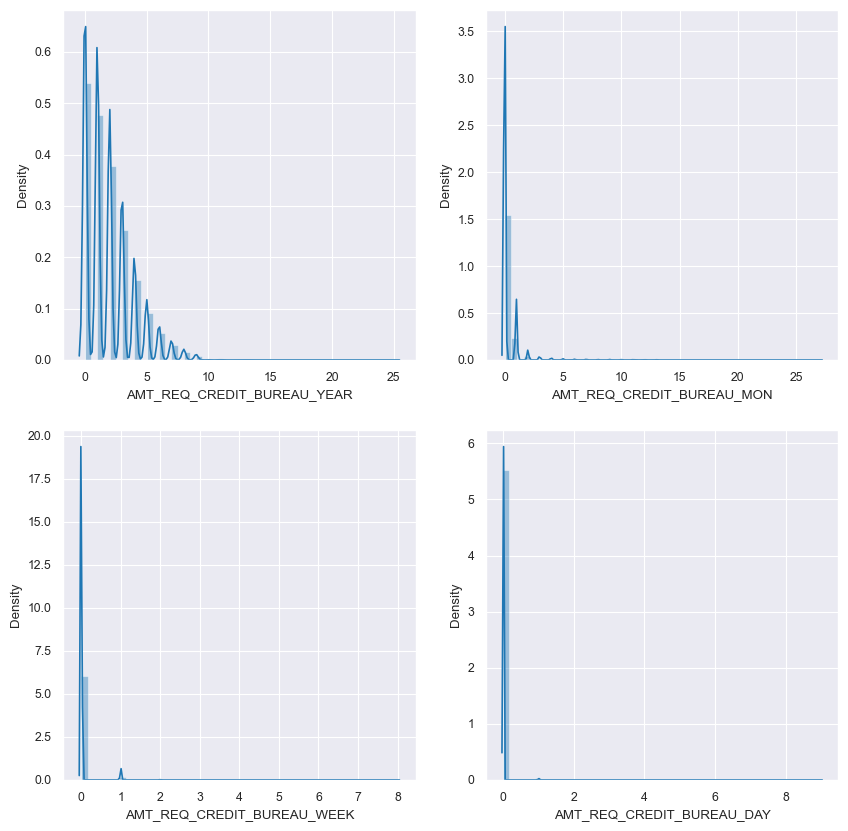

In [58]:
# Part 1: The distribution of numbers with missing values
sns.set_style('darkgrid')
fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.set_context('paper', font_scale=1)

sns.distplot(dataset_train['AMT_REQ_CREDIT_BUREAU_YEAR'], ax=ax[0][0])

sns.distplot(dataset_train['AMT_REQ_CREDIT_BUREAU_MON'], ax=ax[0][1])

sns.distplot(dataset_train['AMT_REQ_CREDIT_BUREAU_WEEK'], ax=ax[1][0])

sns.distplot(dataset_train['AMT_REQ_CREDIT_BUREAU_DAY'], ax=ax[1][1])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4492\2934746863.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_train['AMT_REQ_CREDIT_BUREAU_HOUR'], ax=ax[0][0])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4492\2934746863.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_train['A

<Axes: xlabel='AMT_ANNUITY', ylabel='Density'>

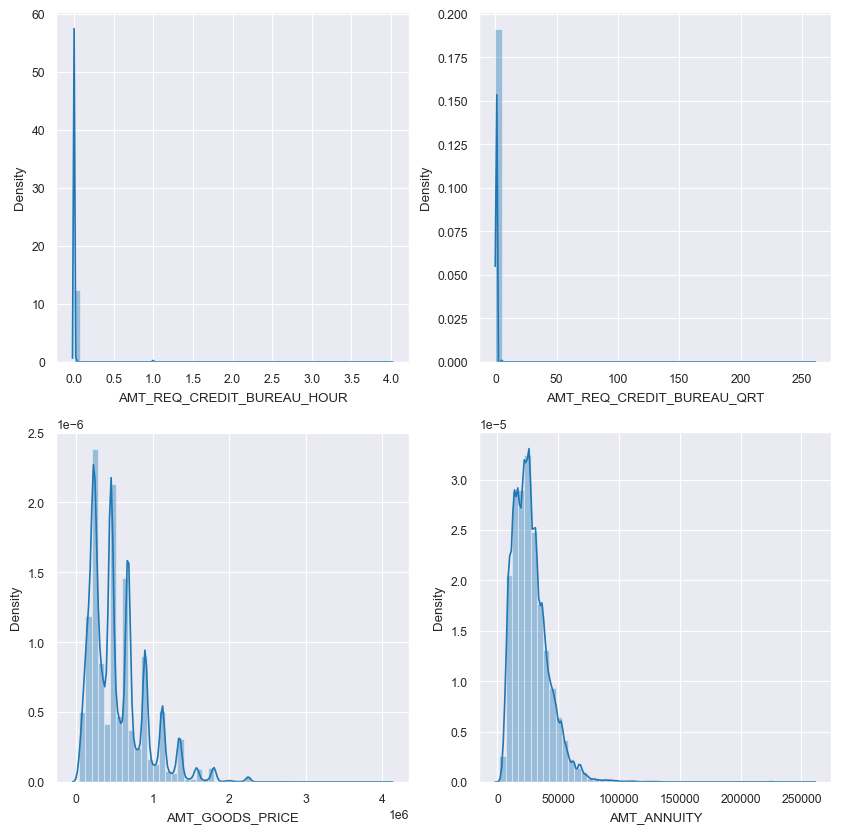

In [59]:
# Part 2: The distribution of numbers with missing values
sns.set_style('darkgrid')
fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.set_context('paper', font_scale=1)

sns.distplot(dataset_train['AMT_REQ_CREDIT_BUREAU_HOUR'], ax=ax[0][0])

sns.distplot(dataset_train['AMT_REQ_CREDIT_BUREAU_QRT'], ax=ax[0][1])

sns.distplot(dataset_train['AMT_GOODS_PRICE'], ax=ax[1][0])

sns.distplot(dataset_train['AMT_ANNUITY'], ax=ax[1][1])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4492\1851561301.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_train['DEF_30_CNT_SOCIAL_CIRCLE'], ax=ax[0][0])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4492\1851561301.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_train['OBS

<Axes: xlabel='OBS_60_CNT_SOCIAL_CIRCLE', ylabel='Density'>

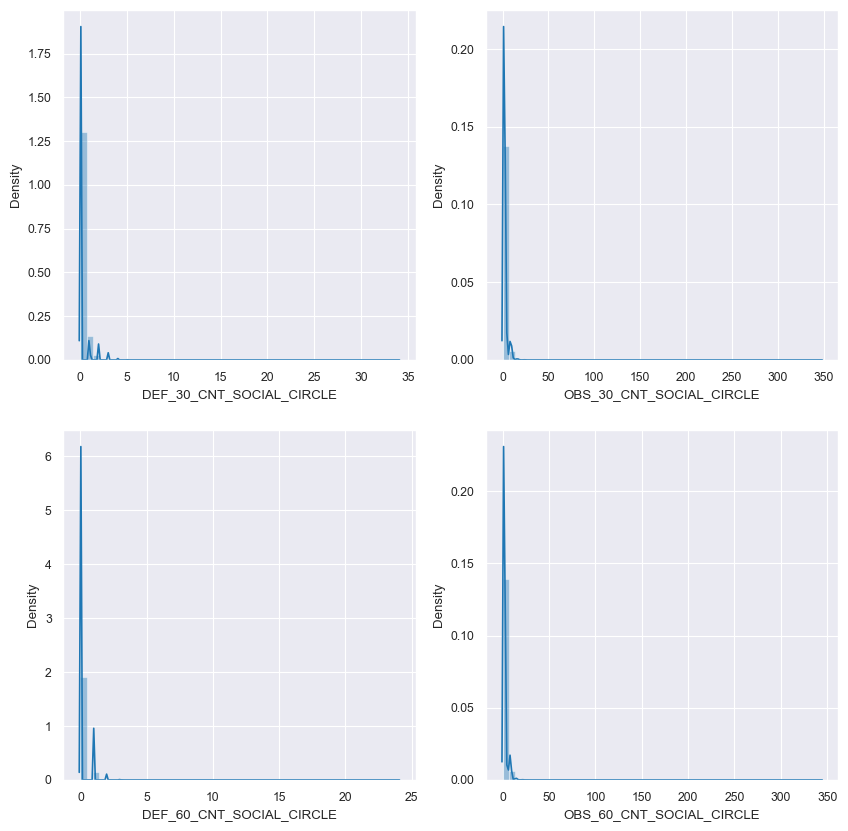

In [60]:
# Part 3: The distribution of numbers with missing values
sns.set_style('darkgrid')
fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.set_context('paper', font_scale=1)

sns.distplot(dataset_train['DEF_30_CNT_SOCIAL_CIRCLE'], ax=ax[0][0])

sns.distplot(dataset_train['OBS_30_CNT_SOCIAL_CIRCLE'], ax=ax[0][1])

sns.distplot(dataset_train['DEF_60_CNT_SOCIAL_CIRCLE'], ax=ax[1][0])

sns.distplot(dataset_train['OBS_60_CNT_SOCIAL_CIRCLE'], ax=ax[1][1])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4492\4082922459.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_train['CNT_FAM_MEMBERS'], ax=ax[0])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4492\4082922459.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_train['DAYS_LAST_PHONE

<Axes: xlabel='DAYS_LAST_PHONE_CHANGE', ylabel='Density'>

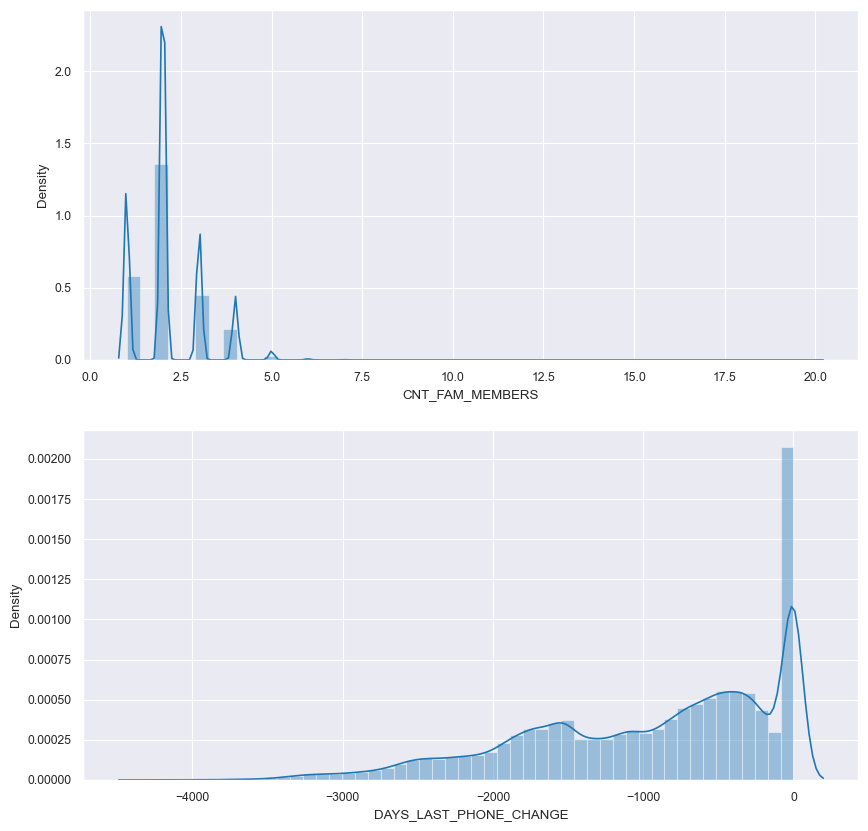

In [61]:
# Part 4: The distribution of numbers with missing values
sns.set_style('darkgrid')
fig, ax = plt.subplots(2, figsize=(10,10))
sns.set_context('paper', font_scale=1)

sns.distplot(dataset_train['CNT_FAM_MEMBERS'], ax=ax[0])

sns.distplot(dataset_train['DAYS_LAST_PHONE_CHANGE'], ax=ax[1])

It is clear that the above-mentioned numerical features don't have a normal distribution, so the median will be used to fill in the blanks for those features.

In [62]:
# Replace missing values with the median because the data is skewed for numerical features
# Replace missing values with mode for categorical features
categorical_columns = dataset_train.select_dtypes(include=['object']).columns.tolist()
numerical_columns = dataset_train.select_dtypes(include=['int64','float64']).columns.tolist()

for column in dataset_train:
    if dataset_train[column].isnull().any():
        if(column in categorical_columns):
            dataset_train[column]=dataset_train[column].fillna(dataset_train[column].mode()[0])
        else:
            dataset_train[column]=dataset_train[column].fillna(dataset_train[column].median())

In [63]:
print('Missing values status:', dataset_train.isnull().values.any())
mv = pd.DataFrame(dataset_train.isnull().sum(), columns=['Total Missing Values'])
mv['%'] = (mv['Total Missing Values']/dataset_train.shape[0])*100
mv.sort_values(by=['%'], ascending=False).reset_index()

Missing values status: False


,index,Total Missing Values,%
0,SK_ID_CURR,0,0.0
1,REG_CITY_NOT_WORK_CITY,0,0.0
2,FLAG_DOCUMENT_8,0,0.0
3,FLAG_DOCUMENT_7,0,0.0
4,FLAG_DOCUMENT_6,0,0.0
5,FLAG_DOCUMENT_5,0,0.0
6,FLAG_DOCUMENT_4,0,0.0
7,FLAG_DOCUMENT_3,0,0.0
8,FLAG_DOCUMENT_2,0,0.0
9,DAYS_LAST_PHONE_CHANGE,0,0.0


### Detecting Data Duplication

In [64]:
print('The number of duplication is:', dataset_train.duplicated().sum())

The number of duplication is: 0


## Detecting Outliers

In [65]:
# Part 1: The distribution of Numerical Features
num_features = dataset_train[["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "CNT_FAM_MEMBERS"]]

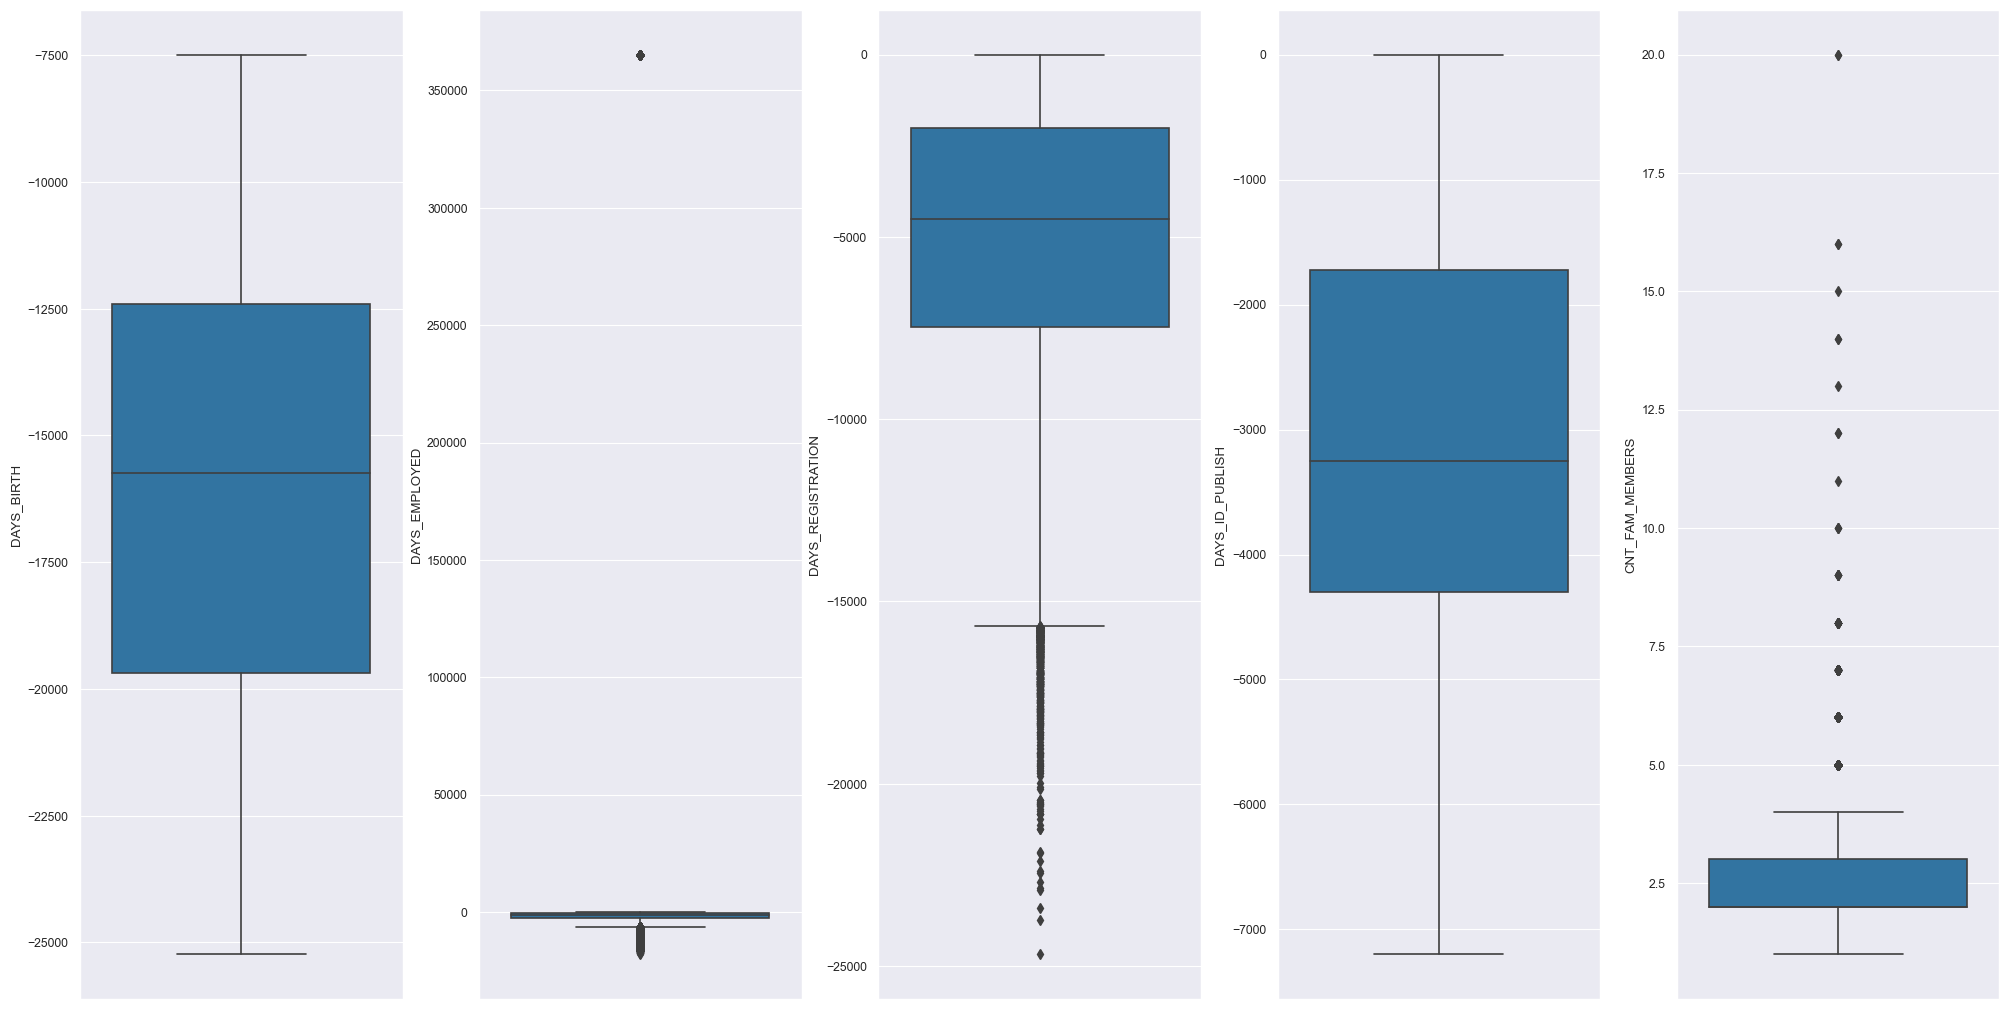

In [66]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in num_features.items():
    sns.boxplot(y = k, data = num_features, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [67]:
# Part 2: The distribution of Numerical Features
num_features = dataset_train[["AMT_REQ_CREDIT_BUREAU_YEAR", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_HOUR"]]

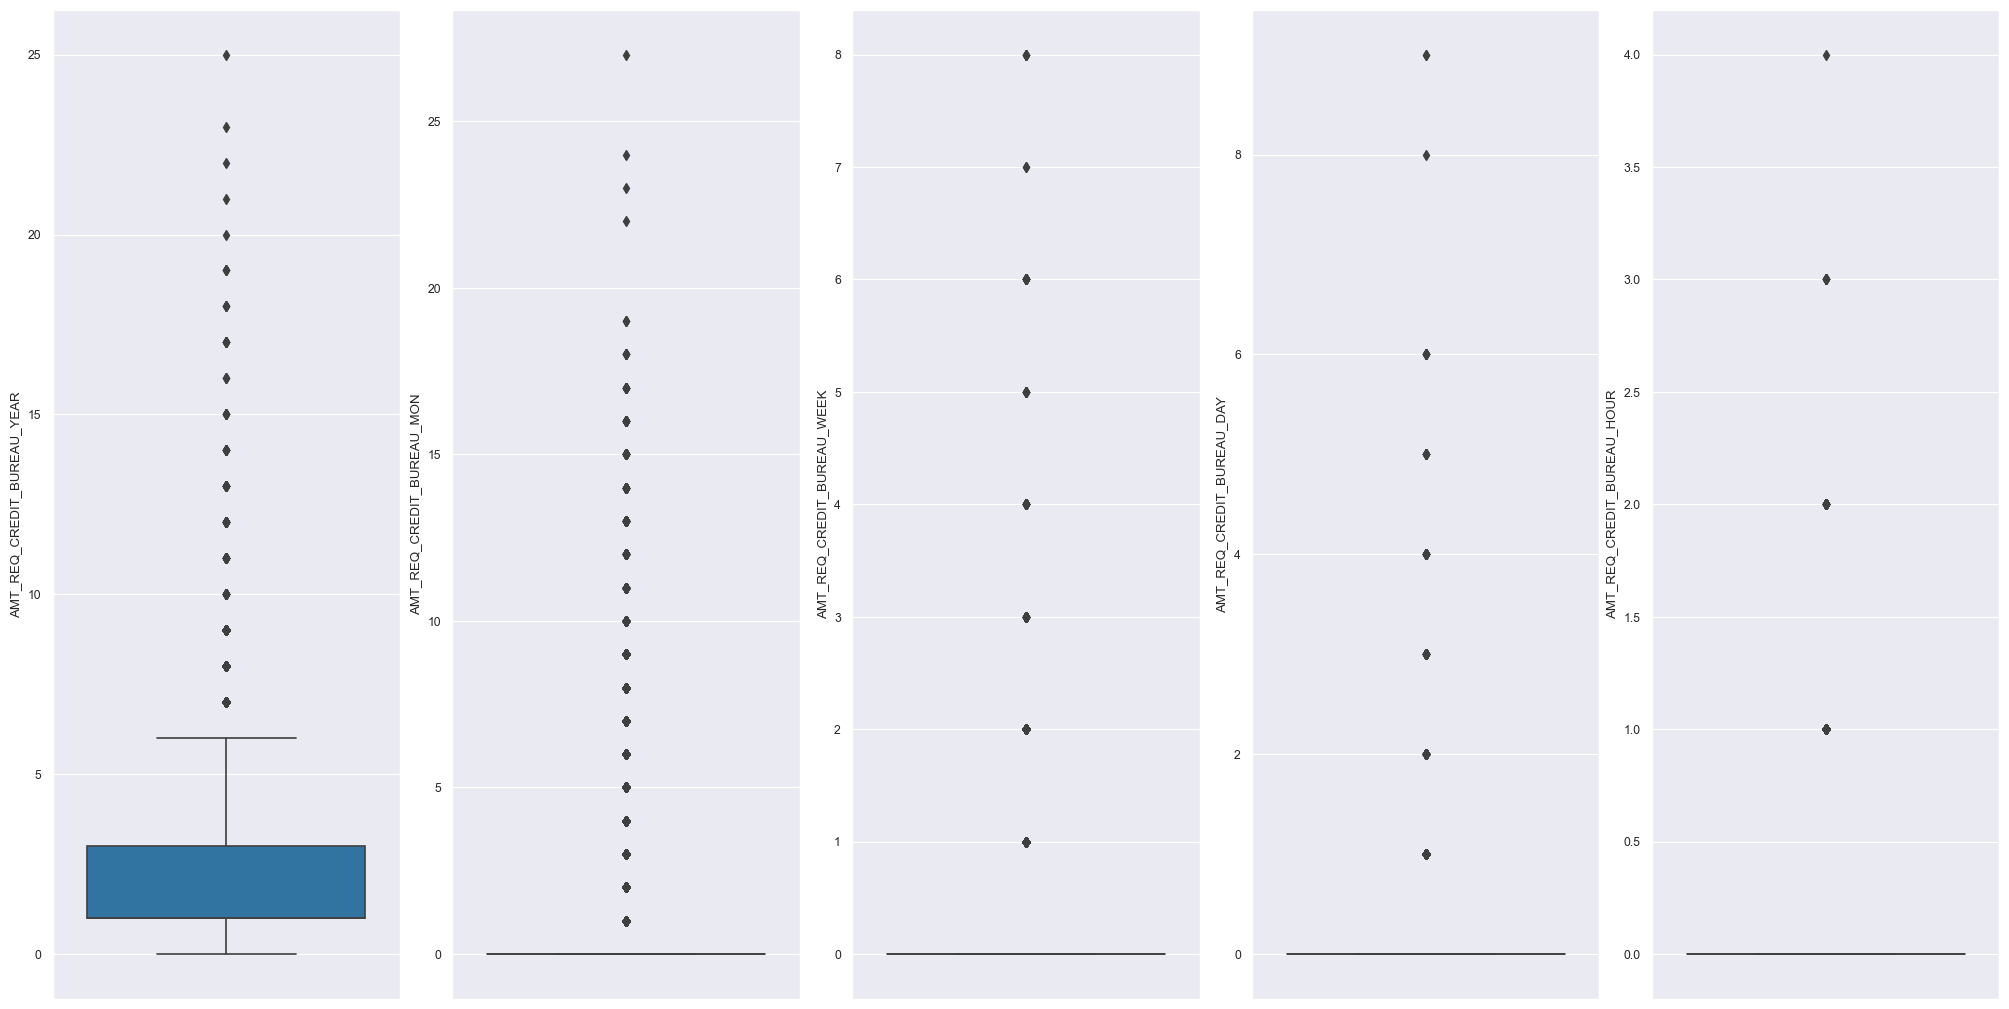

In [68]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in num_features.items():
    sns.boxplot(y = k, data = num_features, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


In [69]:
# Part 3: The distribution of Numerical Features
num_features = dataset_train[["OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "REGION_POPULATION_RELATIVE"]]

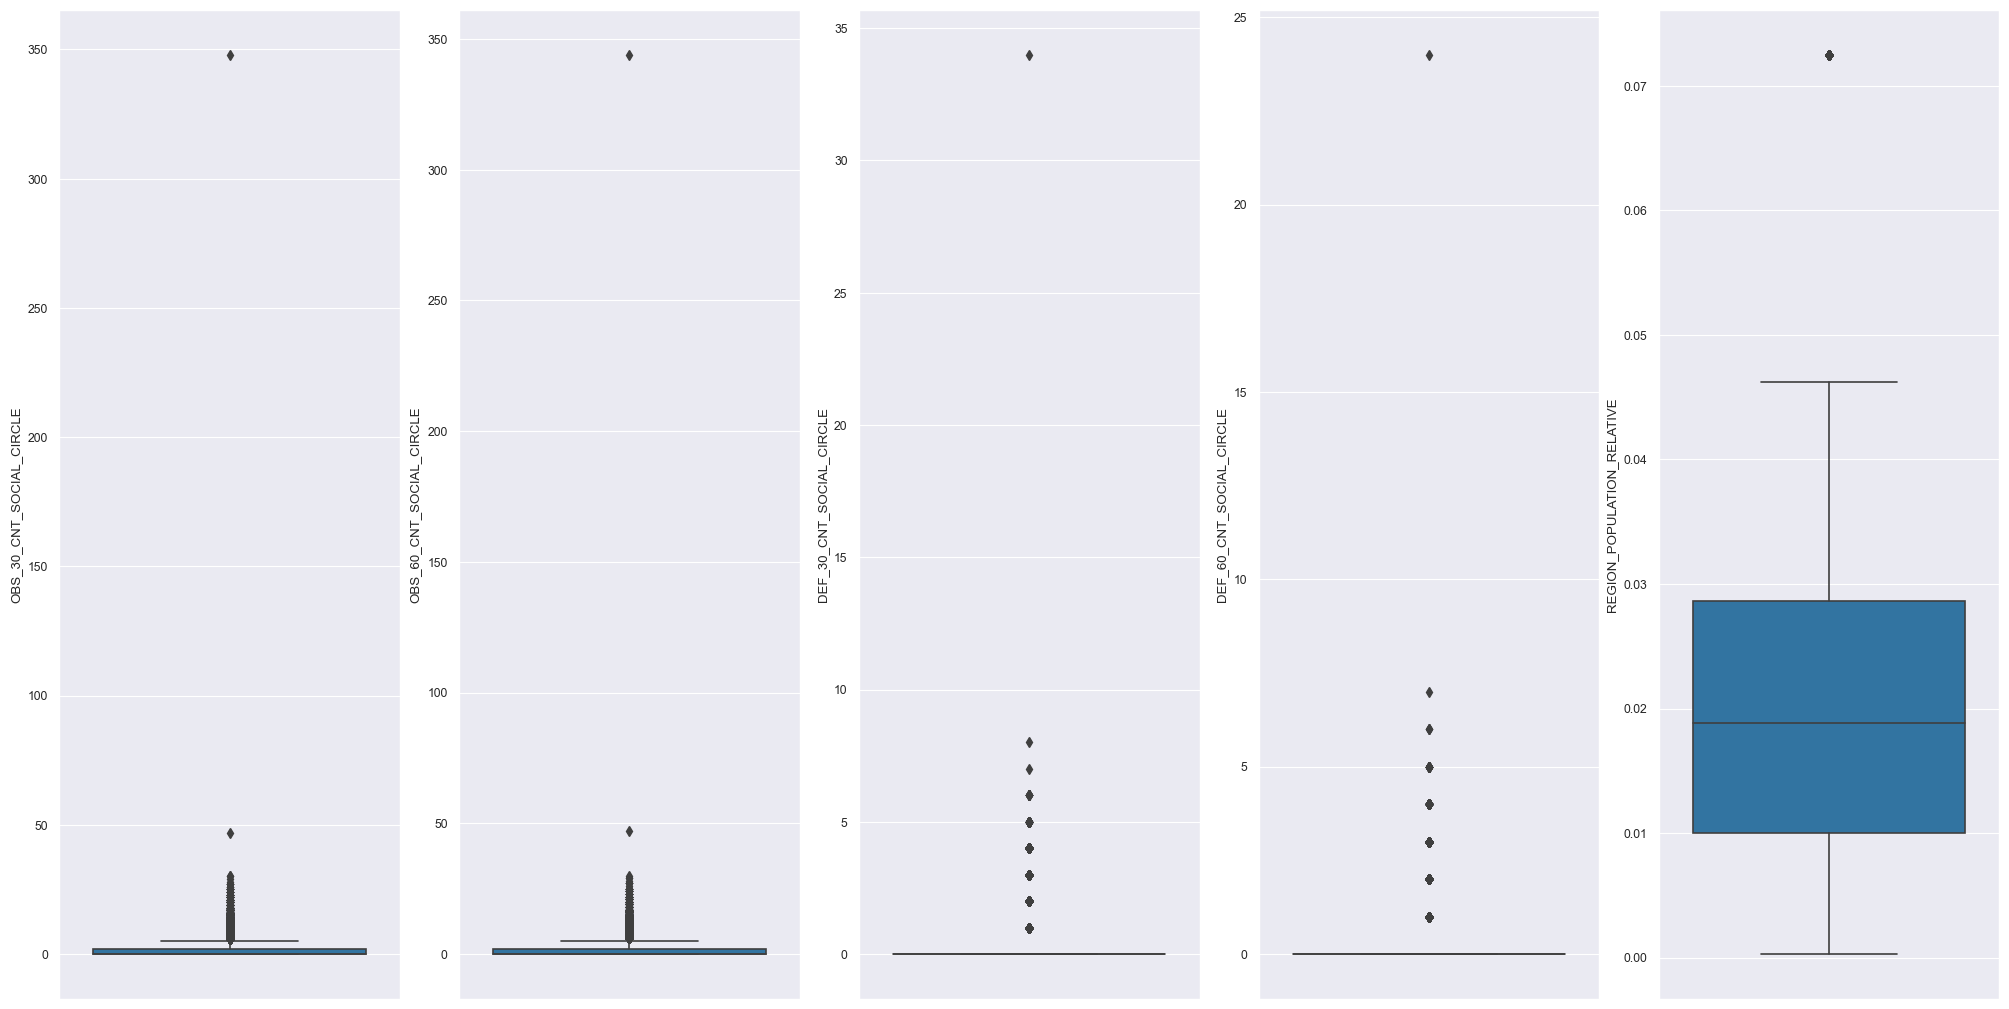

In [70]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in num_features.items():
    sns.boxplot(y = k, data = num_features, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [71]:
# Part 4: The distribution of Numerical Features
num_features = dataset_train[["REGION_RATING_CLIENT", "HOUR_APPR_PROCESS_START", "DAYS_LAST_PHONE_CHANGE", "FLAG_DOCUMENT_2", "AMT_REQ_CREDIT_BUREAU_QRT"]]

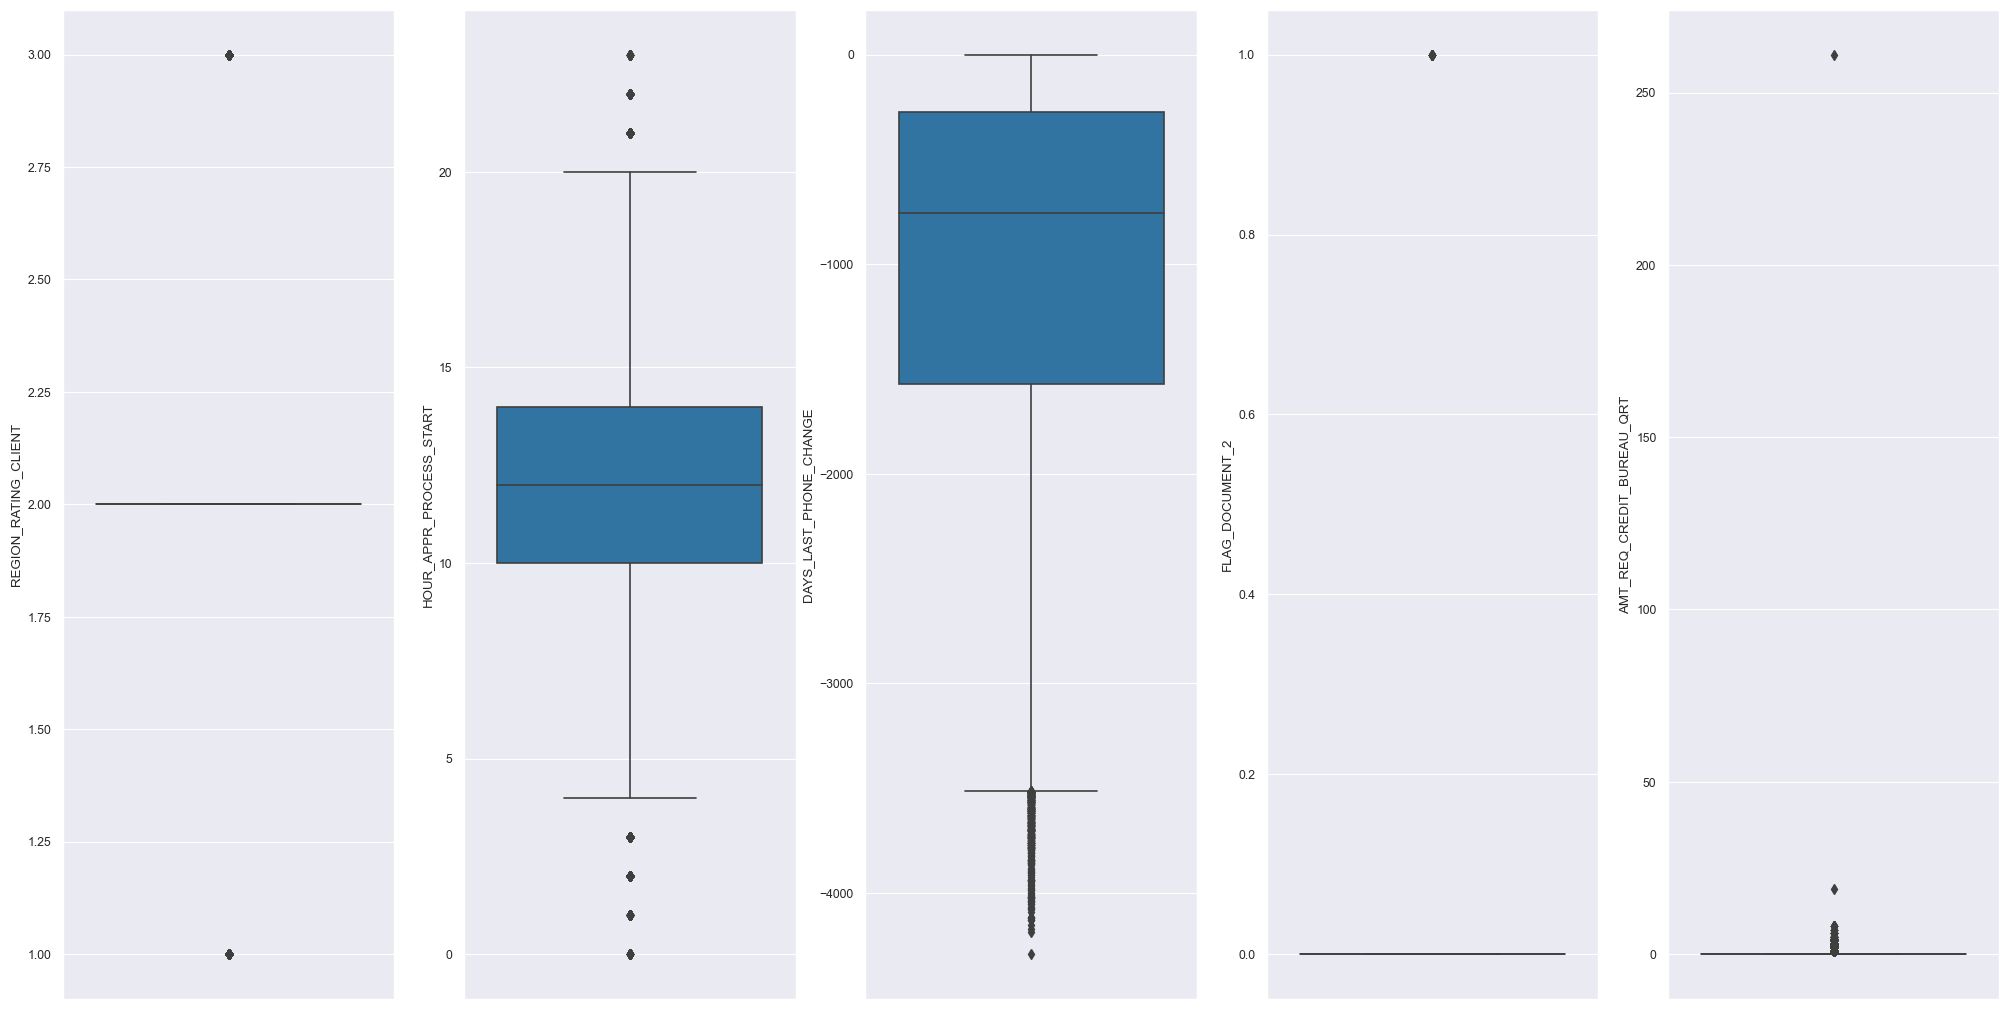

In [72]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in num_features.items():
    sns.boxplot(y = k, data = num_features, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [73]:
# Part 5: The distribution of Numerical Features
num_features = dataset_train[["CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]]

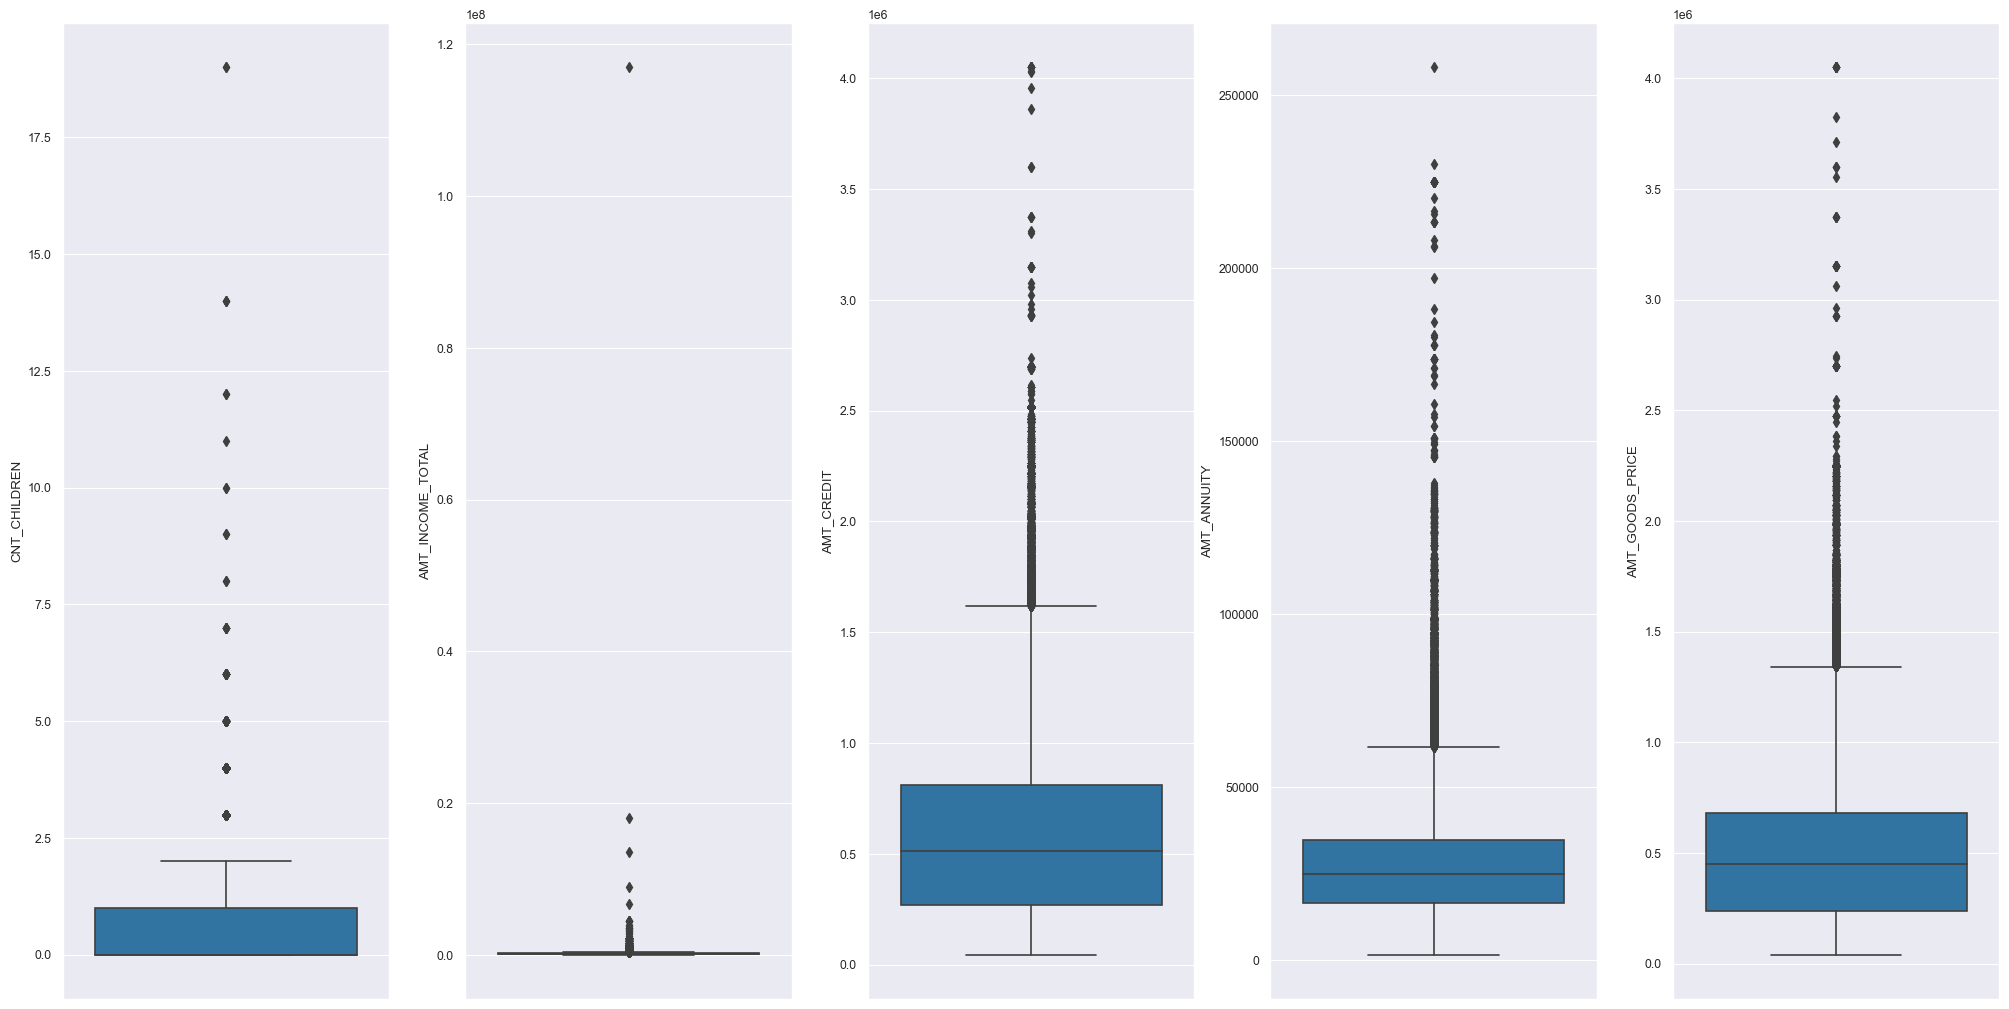

In [74]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in num_features.items():
    sns.boxplot(y = k, data = num_features, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

## Machine Learning Models

### Label Encoding

In [75]:
# label encoder for object features
dataset_train[["NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]] = dataset_train[["NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]].apply(LabelEncoder().fit_transform)

In [76]:
dataset_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,1,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,3,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Feature Selection

#### Drop SK_ID_CURR

In [77]:
dataset_train.drop(['SK_ID_CURR'], inplace=True, axis=1)

In [78]:
dataset_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,1,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,3,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
# Change negative numbers to positive ones
# DAYS_BIRTH, DAYS_EMPLOYED, DAYS_ID_PUBLISH, DAYS_REGISTRATION, and DAYS_LAST_PHONE_CHANGE are the things that have negative values.
dataset_train.iloc[:,16:20] = dataset_train.iloc[:,16:20].abs()
dataset_train.iloc[:,45] = dataset_train.iloc[:,45].abs()

In [80]:
x = dataset_train.drop(['TARGET'], axis=1)
y = dataset_train['TARGET']

In [81]:
# Feature Selection
best_ft = SelectKBest(score_func=chi2, k=8)
fit = best_ft.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Features', 'Score']
print('Features with strong correlations to the target feature:\n')
featureScores.sort_values(by=['Score'], ascending=False)

Features with strong correlations to the target feature:



,Features,Score
16,DAYS_EMPLOYED,1.954124e+08
8,AMT_GOODS_PRICE,1.223080e+08
6,AMT_CREDIT,7.669987e+07
15,DAYS_BIRTH,2.235391e+06
5,AMT_INCOME_TOTAL,1.624102e+06
17,DAYS_REGISTRATION,1.348566e+06
44,DAYS_LAST_PHONE_CHANGE,6.656876e+05
18,DAYS_ID_PUBLISH,6.195946e+05
7,AMT_ANNUITY,3.913092e+05
37,ORGANIZATION_TYPE,4.138607e+03


Which features are most closely associated with payment difficulties can be observed.

The best attributes are AMT_GOODS_PRICE, AMT_CREDIT, and DAYS_EMPLOYED.

FLAG_MOBIL, FLAG_CONT_MOBILE, and AMT_REQ_CREDIT_BUREAU_HOUR are the worst features.

### Managing Data Imbalance

In [82]:
# create two different dataframe of majority and minority class 
dataset_majority = dataset_train[(dataset_train['TARGET']==0)] 
dataset_minority = dataset_train[(dataset_train['TARGET']==1)] 

# upsample minority class
dataset_minority_upsampled = resample(dataset_minority, 
                                 replace=True,    
                                 n_samples= 282686,
                                 random_state=42)

# mix the upsampled minority class with the majority class.
dataset_upsampled = pd.concat([dataset_minority_upsampled, dataset_majority])

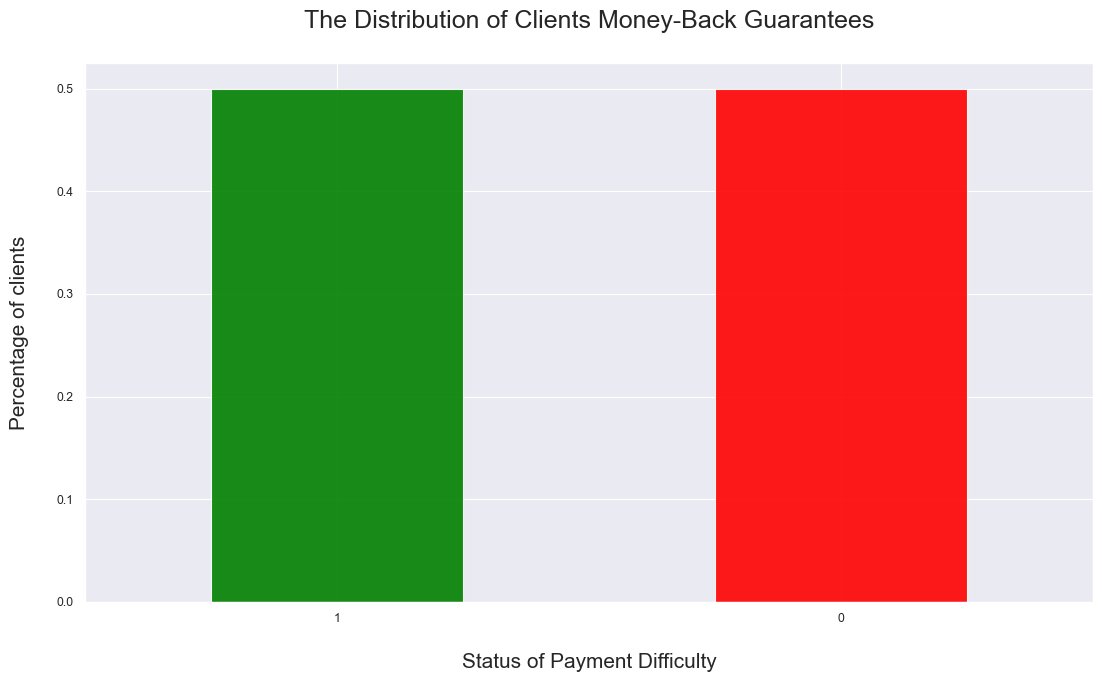

In [83]:
fig = plt.figure(figsize = (13,7))
dataset_upsampled['TARGET'].value_counts(normalize=True).plot(kind='bar', color= ['green','red'], alpha = 0.9, rot=0)
plt.title('The Distribution of Clients Money-Back Guarantees\n', fontsize=18)
plt.ylabel('Percentage of clients\n', fontsize=15)
plt.xlabel('\nStatus of Payment Difficulty', fontsize=15)
plt.show()

### Splitting Data

In [84]:
# Only top 20 features
X = dataset_upsampled[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 
                           'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION', 
                           'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY', 
                           'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
                          'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
                          'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']]
y = dataset_upsampled['TARGET']

In [85]:
# splitting tha data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape, X_test.shape)

(424029, 20) (141343, 20)


In [86]:
# normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Model Building

#### A) Logistic Regression

In [87]:
# train the model
logressor = LogisticRegression().fit(X_train, y_train)
print(logressor)

LogisticRegression()


In [88]:
# predict
y_train_pred_log = logressor.predict(X_train)

# print classification report
print('Training Model for Classification Reports (Logistic Regression):')
print(classification_report(y_train, y_train_pred_log))

Training Model for Classification Reports (Logistic Regression):
              precision    recall  f1-score   support

           0       0.67      0.68      0.67    211764
           1       0.68      0.66      0.67    212265

    accuracy                           0.67    424029
   macro avg       0.67      0.67      0.67    424029
weighted avg       0.67      0.67      0.67    424029



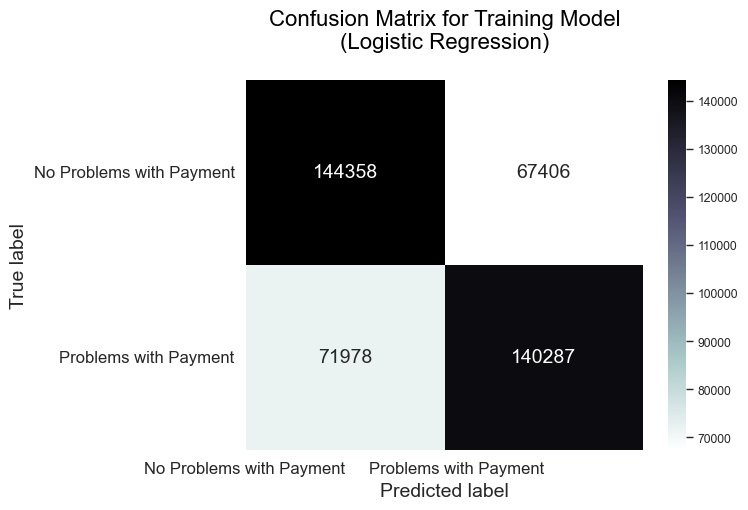

In [89]:
# form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_train, y_train_pred_log)), ('No Problems with Payment', 'Problems with Payment'), ('No Problems with Payment', 'Problems with Payment'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)\n', fontsize=16, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [90]:
# predict data test
y_test_pred_log = logressor.predict(X_test)

# print classification report
print('Testing Model for Classification Reports (Logistic Regression):')
print(classification_report(y_test, y_test_pred_log))

Testing Model for Classification Reports (Logistic Regression):
              precision    recall  f1-score   support

           0       0.67      0.68      0.68     70922
           1       0.68      0.66      0.67     70421

    accuracy                           0.67    141343
   macro avg       0.67      0.67      0.67    141343
weighted avg       0.67      0.67      0.67    141343



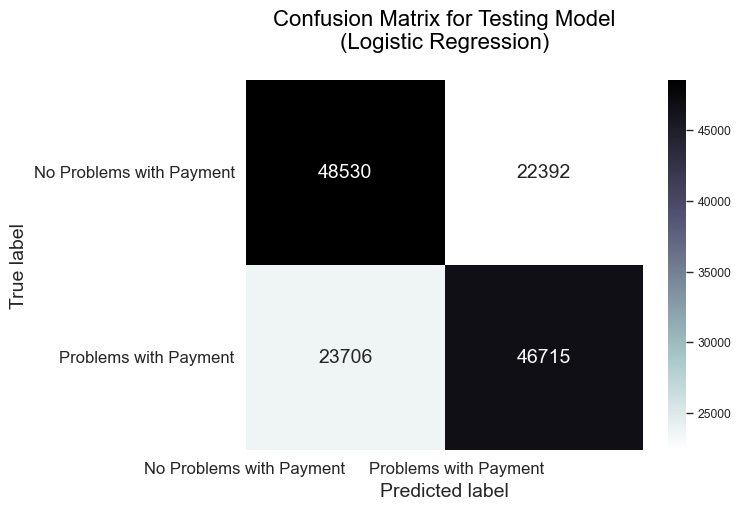

In [91]:
# form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_test, y_test_pred_log)), ('No Problems with Payment', 'Problems with Payment'), ('No Problems with Payment', 'Problems with Payment'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=16, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [92]:
acc_log_train=round(logressor.score(X_train,y_train)*100,2)
acc_log_test=round(logressor.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Test Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 67.13
Test Accuracy: % 67.39


As can be observed,

57.69% of results from the logistic regression model are accurate.
There is 0.5% error margin. 

In [93]:
# ROC scores
roc_auc_log = round(roc_auc_score(y_test, y_test_pred_log),2)
print('ROC AUC:', roc_auc_log)

ROC AUC: 0.67


#### B) Decision Tree

In [94]:
# train the model
decision = DecisionTreeClassifier().fit(X_train,y_train)
print(decision)

DecisionTreeClassifier()


In [95]:
# predict data train
y_train_pred_decision = decision.predict(X_train)

# print classification report
print('Training Model for Classification Reports (Decision Tree Classifier):')
print(classification_report(y_train, y_train_pred_decision))

Training Model for Classification Reports (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    211764
           1       1.00      1.00      1.00    212265

    accuracy                           1.00    424029
   macro avg       1.00      1.00      1.00    424029
weighted avg       1.00      1.00      1.00    424029



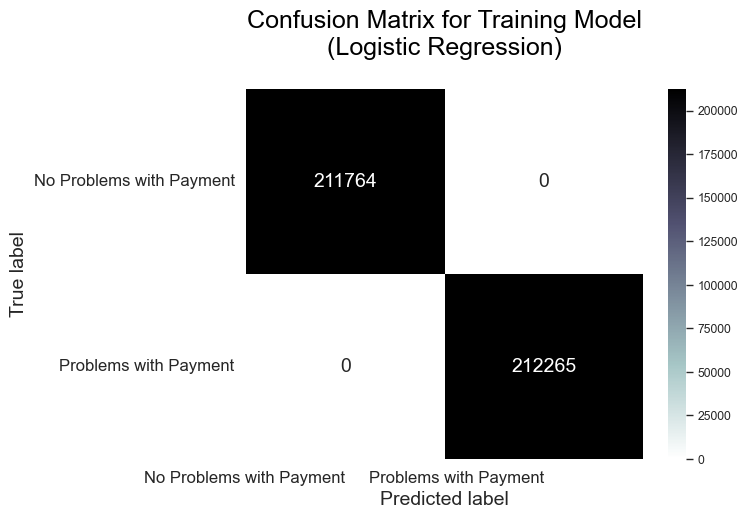

In [96]:
# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_train, y_train_pred_decision)), ('No Problems with Payment', 'Problems with Payment'), ('No Problems with Payment', 'Problems with Payment'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [97]:
# predict data test
y_test_pred_decision = decision.predict(X_test)

# print classification report
print('Testing Model for Classification Reports(Decision Tree Classifier):')
print(classification_report(y_test, y_test_pred_decision))

Testing Model for Classification Reports(Decision Tree Classifier):
              precision    recall  f1-score   support

           0       0.83      0.90      0.86     70922
           1       0.89      0.81      0.85     70421

    accuracy                           0.86    141343
   macro avg       0.86      0.86      0.86    141343
weighted avg       0.86      0.86      0.86    141343



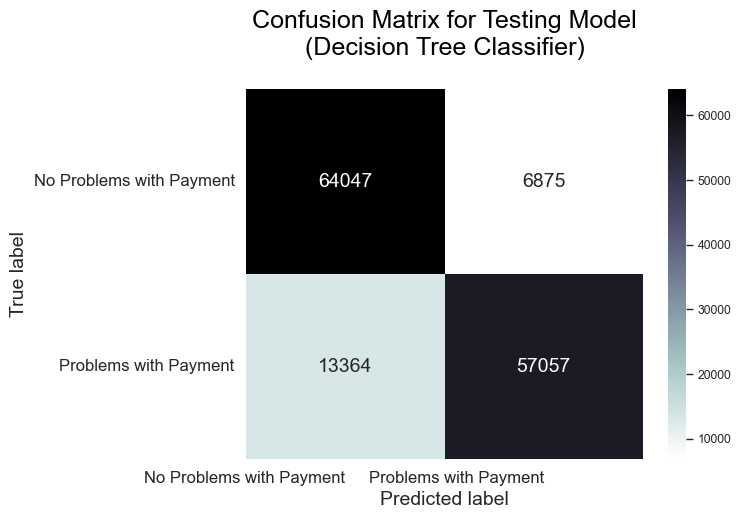

In [98]:
# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_test, y_test_pred_decision)), ('No Problems with Payment', 'Problems with Payment'), ('No Problems with Payment', 'Problems with Payment'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)

plt.title('Confusion Matrix for Testing Model\n(Decision Tree Classifier)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [99]:
acc_dt_train=round(decision.score(X_train,y_train)*100,2)
acc_dt_test=round(decision.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_dt_train))
print("Test Accuracy: % {}".format(acc_dt_test))

Training Accuracy: % 100.0
Test Accuracy: % 85.68


As can be observed,

100% of results from the decision tree regression model are accurate. There is 15% error margin.

In [100]:
# ROC scores
roc_auc_decision = round(roc_auc_score(y_test, y_test_pred_decision),2)
print('ROC AUC:', roc_auc_decision)

ROC AUC: 0.86


#### C) Random Forest

In [101]:
# train the model
random_forest = RandomForestClassifier().fit(X_train, y_train)
print(random_forest)

RandomForestClassifier()


In [102]:
# predict data train
y_train_pred_rf = random_forest.predict(X_train)

# print classification report
print('Training Model for Classification Reports (Random Forest Classifier):')
print(classification_report(y_train, y_train_pred_rf))

Training Model for Classification Reports (Random Forest Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    211764
           1       1.00      1.00      1.00    212265

    accuracy                           1.00    424029
   macro avg       1.00      1.00      1.00    424029
weighted avg       1.00      1.00      1.00    424029



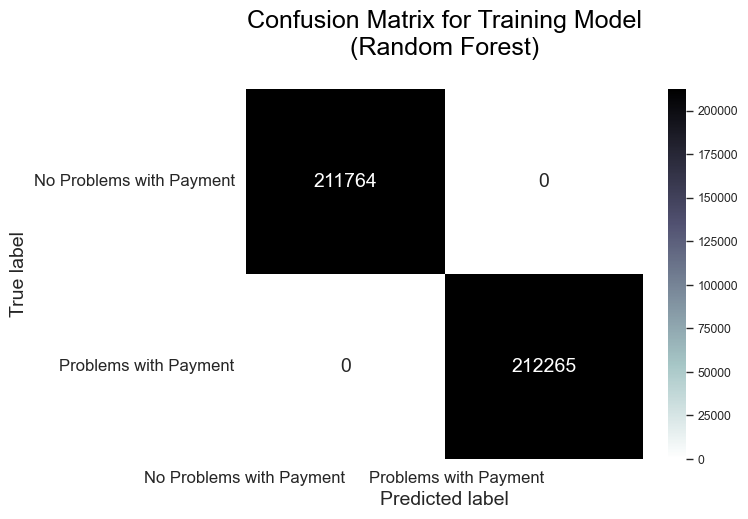

In [103]:
# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_train, y_train_pred_rf)), ('No Problems with Payment', 'Problems with Payment'), ('No Problems with Payment', 'Problems with Payment'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)

plt.title('Confusion Matrix for Training Model\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [104]:
# predict data test
y_test_pred_rf = random_forest.predict(X_test)

# print classification report
print('Testing Model for Classification Reports(Random Forest Classifier):')
print(classification_report(y_test, y_test_pred_rf))

Testing Model for Classification Reports(Random Forest Classifier):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     70922
           1       0.99      1.00      1.00     70421

    accuracy                           1.00    141343
   macro avg       1.00      1.00      1.00    141343
weighted avg       1.00      1.00      1.00    141343



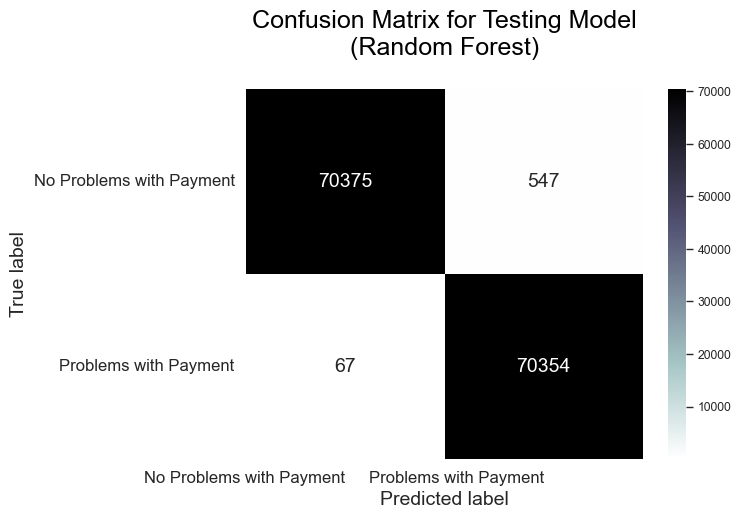

In [105]:
# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_test, y_test_pred_rf)), ('No Problems with Payment', 'Problems with Payment'), ('No Problems with Payment', 'Problems with Payment'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [106]:
acc_rf_train=round(random_forest.score(X_train,y_train)*100,2)
acc_rf_test=round(random_forest.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_rf_train))
print("Test Accuracy: % {}".format(acc_rf_test))

Training Accuracy: % 100.0
Test Accuracy: % 99.57


As can be observed,

100% of results from the decision tree regression model are accurate. There is 0,42% error margin.

In [107]:
# ROC scores
roc_auc_rf = round(roc_auc_score(y_test, y_test_pred_rf),4)
print('ROC AUC:', roc_auc_rf)

ROC AUC: 0.9957


C:\Users\ASUS\AppData\Local\Temp\ipykernel_4492\3447113891.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


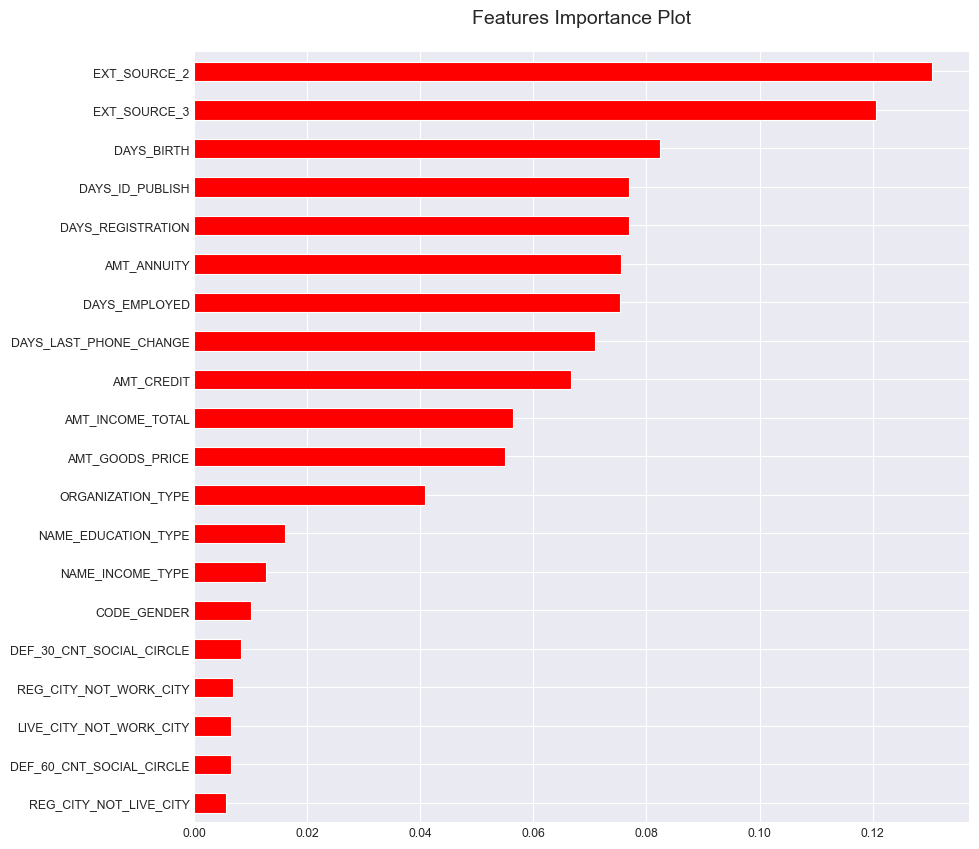

In [108]:
# Important features
importances_rf = pd.Series(random_forest.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,10))
fig = importances_rf.plot(kind ='barh', color ='red')
plt.title('Features Importance Plot\n', fontsize=14)
plt.show()

fig.figure.tight_layout()
fig.figure.savefig('top feature.png')

The above plot verifies that DAYS_BIRTH, DAYS_ID_PUBLISH, DAYS_REGISTRATION, EXT_SOURCE_2, and EXT_SOURCE_3 are the five most significant features.

#### D) K-Nearest Neighbors

In [109]:
# train the model
knn_model = KNeighborsClassifier().fit(X_train,y_train)
print(knn_model)

KNeighborsClassifier()


In [110]:
# predit data train
y_train_pred_knn = knn_model.predict(X_train)

# print classification report
print('Training Model for Classification Reports (K-Nearest Neighbors):')
print(classification_report(y_train, y_train_pred_knn))

Training Model for Classification Reports (K-Nearest Neighbors):
              precision    recall  f1-score   support

           0       1.00      0.82      0.90    211764
           1       0.85      1.00      0.92    212265

    accuracy                           0.91    424029
   macro avg       0.92      0.91      0.91    424029
weighted avg       0.92      0.91      0.91    424029



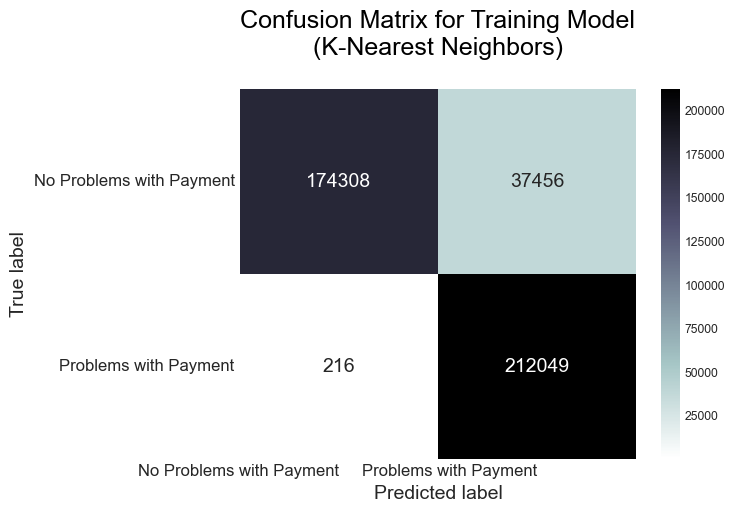

In [111]:
# form confusion matrix as a dataFrame
confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_train, y_train_pred_knn)), ('No Problems with Payment', 'Problems with Payment'), ('No Problems with Payment', 'Problems with Payment'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_knn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)

plt.title('Confusion Matrix for Training Model\n(K-Nearest Neighbors)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [112]:
# predit data test
y_test_pred_knn = knn_model.predict(X_test)

# print classification report
print('Testing Model for Classification Reports (K-Nearest Neighbors):')
print(classification_report(y_test, y_test_pred_knn))

Testing Model for Classification Reports (K-Nearest Neighbors):
              precision    recall  f1-score   support

           0       0.99      0.76      0.86     70922
           1       0.80      0.99      0.89     70421

    accuracy                           0.88    141343
   macro avg       0.90      0.88      0.87    141343
weighted avg       0.90      0.88      0.87    141343



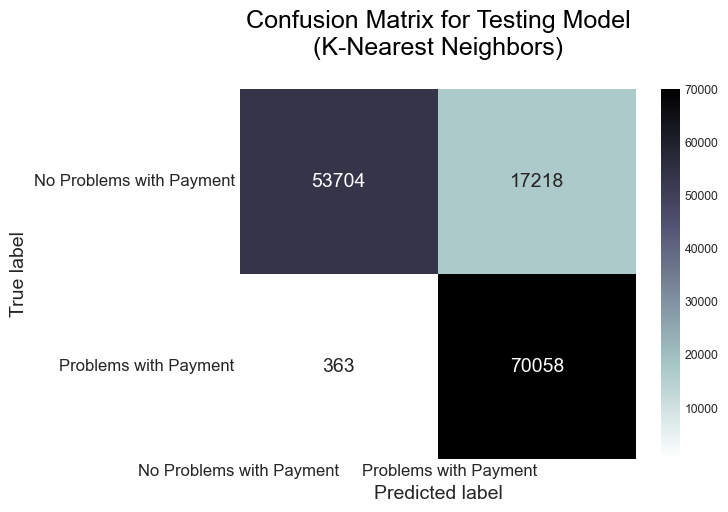

In [113]:
# form confusion matrix as a dataFrame
confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_test, y_test_pred_knn)), ('No Problems with Payment', 'Problems with Payment'), ('No Problems with Payment', 'Problems with Payment'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_knn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)

plt.title('Confusion Matrix for Testing Model\n(K-Nearest Neighbors)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [114]:
acc_knn_train=round(knn_model.score(X_train,y_train)*100,2)
acc_knn_test=round(knn_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_knn_train))
print("Test Accuracy: % {}".format(acc_knn_test))

Training Accuracy: % 91.12
Test Accuracy: % 87.56


As can be observed,

91,12% of results from the decision tree regression model are accurate. There is 3,56% error margin.

In [115]:
# ROC scores
roc_auc_knn = round(roc_auc_score(y_test, y_test_pred_knn),4)
print('ROC AUC:', roc_auc_knn)

ROC AUC: 0.876


### Model Selection

In [116]:
results = pd.DataFrame([["Logistic Regression", 0.6713, 0.6739, 0.67],["Decision Tree", 1, 0.8558, 0.86],["Random Forest", 1, 0.9957, 0.9957],
                       ["K-Nearest Neighbor", 0.9112, 0.8756, 0.876]],
                        columns = ["Models", "Training Accuracy Score", "Testing Accuracy Score", "ROC Score"])

results.sort_values(by=['Training Accuracy Score', 'Testing Accuracy Score'], ascending=False).style.background_gradient(cmap='Purples')

,Models,Training Accuracy Score,Testing Accuracy Score,ROC Score
2,Random Forest,1.000000,0.995700,0.995700
1,Decision Tree,1.000000,0.855800,0.860000
3,K-Nearest Neighbor,0.911200,0.875600,0.876000
0,Logistic Regression,0.671300,0.673900,0.670000


In the Random Forest model, the difference between the train and test data in terms of prediction accuracy is not very big. This means that the model is very good, as there is no underfitting or overfitting. The Random Forest model was chosen because it was the best at predicting how well a client would be able to pay back the loan.

## Prediction

### Data Application (Test)

In [117]:
dataset_test = pd.read_csv("application_test.csv", sep=',')
print('The collection of data includes %d rows and %d columns. \n' % dataset_test.shape)
dataset_test.head()

The collection of data includes 48744 rows and 121 columns. 



,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

## Preprocessing Data

### Detecting Missing Values

In [118]:
# Find elements that are empty
print('Missing values status:', dataset_test.isnull().values.any())
mv_test = pd.DataFrame(dataset_test.isnull().sum(), columns=['Total Missing Values'])
mv_test['%'] = (mv_test['Total Missing Values']/dataset_test.shape[0])*100
mv_test.sort_values(by=['%'], ascending=False).reset_index()

Missing values status: True


,index,Total Missing Values,%
0,COMMONAREA_AVG,33495,68.716150
1,COMMONAREA_MODE,33495,68.716150
2,COMMONAREA_MEDI,33495,68.716150
3,NONLIVINGAPARTMENTS_AVG,33347,68.412523
4,NONLIVINGAPARTMENTS_MODE,33347,68.412523
5,NONLIVINGAPARTMENTS_MEDI,33347,68.412523
6,FONDKAPREMONT_MODE,32797,67.284179
7,LIVINGAPARTMENTS_AVG,32780,67.249302
8,LIVINGAPARTMENTS_MODE,32780,67.249302
9,LIVINGAPARTMENTS_MEDI,32780,67.249302


In [119]:
# Drop features that have a lot of empty fields (± 50%)
dataset_test.drop(dataset_test.iloc[:, 43:90], inplace=True, axis=1)
dataset_test.drop(['OWN_CAR_AGE','EXT_SOURCE_1'], inplace=True, axis=1)

In [120]:
# After drop some features 
print('Missing values status:', dataset_test.isnull().values.any())
mv_test = pd.DataFrame(dataset_test.isnull().sum(), columns=['Total Missing Values'])
mv_test['%'] = (mv_test['Total Missing Values']/dataset_test.shape[0])*100
mv_test.sort_values(by=['%'], ascending=False).reset_index()

Missing values status: True


,index,Total Missing Values,%
0,OCCUPATION_TYPE,15605,32.014197
1,EXT_SOURCE_3,8668,17.782701
2,AMT_REQ_CREDIT_BUREAU_YEAR,6049,12.409732
3,AMT_REQ_CREDIT_BUREAU_QRT,6049,12.409732
4,AMT_REQ_CREDIT_BUREAU_MON,6049,12.409732
5,AMT_REQ_CREDIT_BUREAU_WEEK,6049,12.409732
6,AMT_REQ_CREDIT_BUREAU_DAY,6049,12.409732
7,AMT_REQ_CREDIT_BUREAU_HOUR,6049,12.409732
8,NAME_TYPE_SUITE,911,1.868948
9,OBS_30_CNT_SOCIAL_CIRCLE,29,0.059495


In [121]:
# Replace missing values with the median because the data is skewed for numerical features
# Replace missing values with mode for categorical features
categorical_columns = dataset_test.select_dtypes(include=['object']).columns.tolist()
numerical_columns = dataset_test.select_dtypes(include=['int64','float64']).columns.tolist()

for column in dataset_test:
    if dataset_test[column].isnull().any():
        if(column in categorical_columns):
            dataset_test[column]=dataset_test[column].fillna(dataset_test[column].mode()[0])
        else:
            dataset_test[column]=dataset_test[column].fillna(dataset_test[column].median())

In [122]:
print('Missing values status:', dataset_test.isnull().values.any())
mv_test = pd.DataFrame(dataset_test.isnull().sum(), columns=['Total Missing Values'])
mv_test['%'] = (mv_test['Total Missing Values']/dataset_test.shape[0])*100
mv_test.sort_values(by=['%'], ascending=False).reset_index()

Missing values status: False


,index,Total Missing Values,%
0,SK_ID_CURR,0,0.0
1,NAME_CONTRACT_TYPE,0,0.0
2,FLAG_DOCUMENT_8,0,0.0
3,FLAG_DOCUMENT_7,0,0.0
4,FLAG_DOCUMENT_6,0,0.0
5,FLAG_DOCUMENT_5,0,0.0
6,FLAG_DOCUMENT_4,0,0.0
7,FLAG_DOCUMENT_3,0,0.0
8,FLAG_DOCUMENT_2,0,0.0
9,DAYS_LAST_PHONE_CHANGE,0,0.0


### Label Encoding

In [123]:
# label encoder for object features
dataset_test[["NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]] = dataset_test[["NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]].apply(LabelEncoder().fit_transform)

In [124]:
dataset_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,6,6,1,1,1,0.018850,-19241,-2329,-5170.0,-812,1,1,0,1,0,1,8,2.0,2,2,5,18,0,0,0,0,0,0,28,0.789654,0.159520,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,6,6,4,1,1,0.035792,-18064,-4469,-9118.0,-1623,1,1,0,1,0,0,9,2.0,2,2,0,9,0,0,0,0,0,0,42,0.291656,0.432962,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,6,6,1,1,1,0.019101,-20038,-4458,-2175.0,-3503,1,1,0,1,0,0,4,2.0,2,2,1,14,0,0,0,0,0,0,54,0.699787,0.610991,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,6,6,4,1,1,0.026392,-13976,-1866,-2000.0,-4208,1,1,0,1,1,0,14,4.0,2,2,6,11,0,0,0,0,0,0,5,0.509677,0.612704,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,6,6,4,1,1,0.010032,-13040,-2191,-4000.0,-4262,1,1,1,1,0,0,8,3.0,2,2,0,5,0,0,0,0,1,1,5,0.425687,0.519097,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [125]:
# Change negative numbers to positive ones
dataset_test.iloc[:,16:20] = dataset_test.iloc[:,16:20].abs()
dataset_test.iloc[:,45] = dataset_test.iloc[:,45].abs()

### Prediction

Predict a client's ability to pay back a loan based on an application data test using the best machine learning model currently available, which is Random Forest.

In [126]:
pred_test = dataset_test[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 
                           'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION', 
                           'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY', 
                           'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
                          'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
                          'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']]
pred_test.head()

,DAYS_EMPLOYED,AMT_GOODS_PRICE,AMT_CREDIT,DAYS_BIRTH,AMT_INCOME_TOTAL,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,AMT_ANNUITY,ORGANIZATION_TYPE,NAME_INCOME_TYPE,REG_CITY_NOT_WORK_CITY,CODE_GENDER,EXT_SOURCE_2,REG_CITY_NOT_LIVE_CITY,NAME_EDUCATION_TYPE,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_3,DEF_60_CNT_SOCIAL_CIRCLE,LIVE_CITY_NOT_WORK_CITY
0,2329,450000.0,568800.0,19241,135000.0,5170.0,1740.0,812,20560.5,28,6,0,0,0.789654,0,1,0.0,0.159520,0.0,0
1,4469,180000.0,222768.0,18064,99000.0,9118.0,0.0,1623,17370.0,42,6,0,1,0.291656,0,4,0.0,0.432962,0.0,0
2,4458,630000.0,663264.0,20038,202500.0,2175.0,856.0,3503,69777.0,54,6,0,1,0.699787,0,1,0.0,0.610991,0.0,0
3,1866,1575000.0,1575000.0,13976,315000.0,2000.0,1805.0,4208,49018.5,5,6,0,0,0.509677,0,4,0.0,0.612704,0.0,0
4,2191,625500.0,625500.0,13040,180000.0,4000.0,821.0,4262,32067.0,5,6,1,1,0.425687,0,4,0.0,0.519097,0.0,1


In [127]:
predict = pd.Series(random_forest.predict(pred_test), name = "TARGET").astype(int)
results = pd.concat([dataset_test['SK_ID_CURR'], predict],axis = 1)
results.to_csv("predict application.csv", index = False)
results.head()

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,0
3,100028,0
4,100038,0


You can do a survey to find out if it's a problem if a client who is on maternity leave or out of work signs up for a cash loan. That way, if you ever have clients with that kind of income, you can suggest the right type of contract so that their applications are accepted.

People between the ages of 35 and 45 don't have any trouble making payments. You can make these clients your top priority.